<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/CN240_Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: EDA and Case Studies

Material: https://r4ds.hadley.nz/eda, https://rafalab.dfci.harvard.edu/dsbook-part-1/dataviz/dataviz-in-practice.html

## Case Study: New insights on poverty

- We will learn more about plotnine/ggplot throguh case studies.
- We want to answer two questions about poverty:
  1. Is it a fair characterization of today's world to say it is divided into western rich nations and the developing world in Africa, Asia, and Latin America?
  2. Has income inequality across countries worsened during the last 40 years?
- We will be using `gapminder` dataset from Gapminder Foundation to answer this question. Learn more about it here, https://www.gapminder.org/data/

In [79]:
# Let's import all necessary library
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import diamonds   # import from plotnine library

In [97]:
# Let's check the data first
gapminder = pd.read_csv('/content/gapminder.csv')
gapminder

,Unnamed: 0,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,1,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,2,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,3,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,4,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,5,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
...,...,...,...,...,...,...,...,...,...,...
10540,10541,West Bank and Gaza,2016,NaN,74.70,NaN,NaN,NaN,Asia,Western Asia
10541,10542,Vietnam,2016,NaN,75.60,NaN,NaN,NaN,Asia,South-Eastern Asia
10542,10543,Yemen,2016,NaN,64.92,NaN,NaN,NaN,Asia,Western Asia
10543,10544,Zambia,2016,NaN,57.10,NaN,NaN,NaN,Africa,Eastern Africa


#### Some questions we want to answer

For each of the six pairs of countries below, which country do you think had the highest child mortality rates in 2015? Which pairs do you think are most similar?

1. Sri Lanka or Turkey
2. Poland or South Korea
3. Malaysia or Russia
4. Pakistan or Vietnam
5. Thailand or South Africa

In [107]:
# Let's check the data

first_pair = ['Sri Lanka','Turkey']
second_pair = ['Poland','South Korea']
third_pair = ['Malaysia','Russia']
fourth_pair = ['Pakistan','Vietnam']
fifth_pair = ['Thailand','South Africa']

columns = ['country','infant_mortality']

display(gapminder[(gapminder['year']==2015) & (gapminder['country'].isin(first_pair)) ][columns])
display(gapminder[(gapminder['year']==2015) & (gapminder['country'].isin(second_pair)) ][columns])
display(gapminder[(gapminder['year']==2015) & (gapminder['country'].isin(third_pair)) ][columns])
display(gapminder[(gapminder['year']==2015) & (gapminder['country'].isin(fourth_pair)) ][columns])
display(gapminder[(gapminder['year']==2015) & (gapminder['country'].isin(fifth_pair)) ][columns])

,country,infant_mortality
10329,Sri Lanka,8.4
10344,Turkey,11.6


,country,infant_mortality
10264,South Korea,2.9
10308,Poland,4.5


,country,infant_mortality
10279,Malaysia,6.0
10313,Russia,8.2


,country,infant_mortality
10302,Pakistan,65.8
10356,Vietnam,17.3


,country,infant_mortality
10327,South Africa,33.6
10338,Thailand,10.5


### Scatterplots

- Q: The relationship between life expectancy versus fertility rates (average number of children per woman) over the year.
- Both are numerical so we use scatterplots.
- Start by looking at 1962.

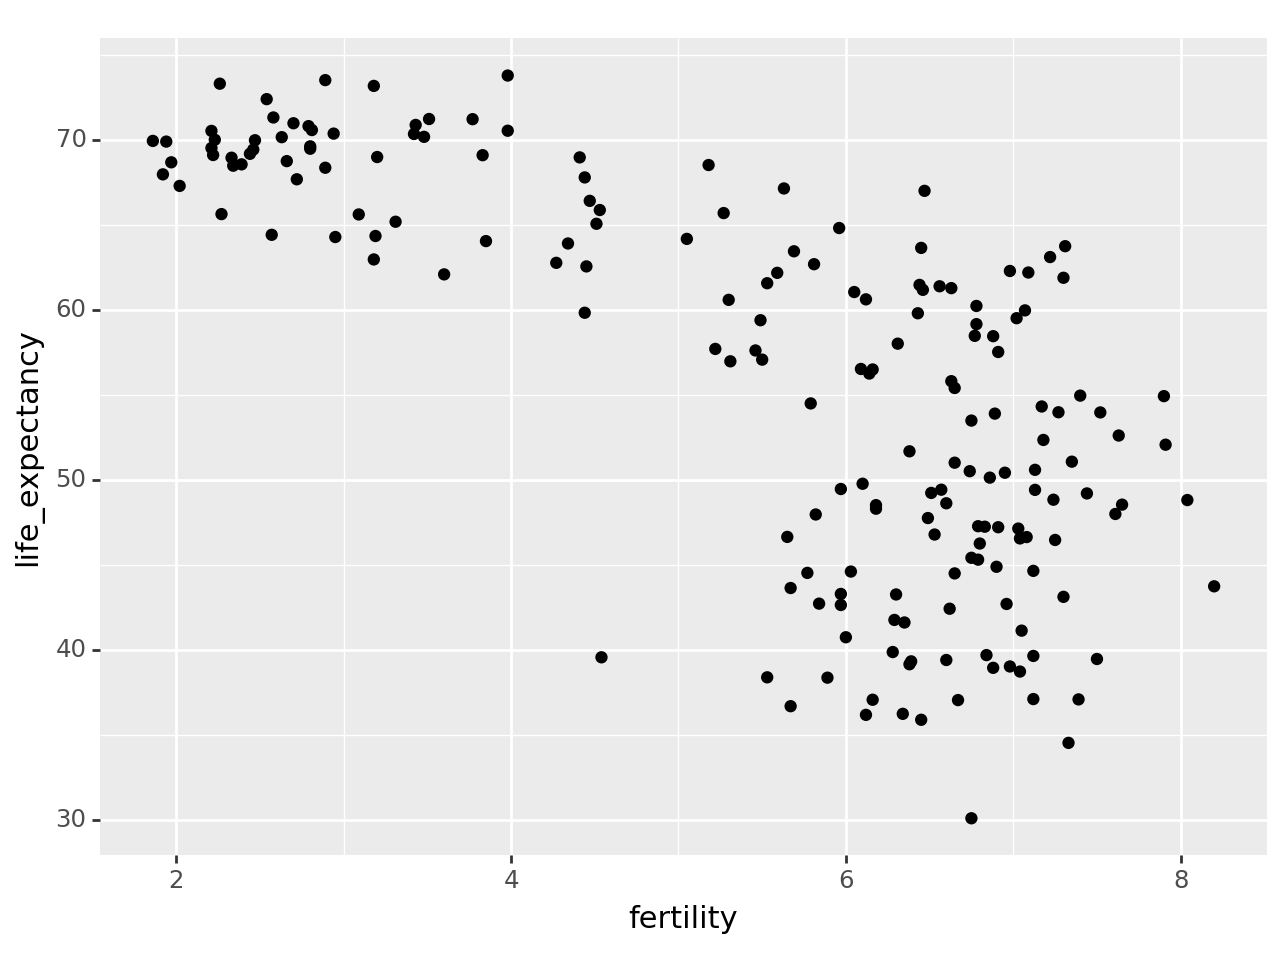

<Figure Size: (640 x 480)>

In [108]:
gapminder_1962 = gapminder[gapminder['year']==1962]
ggplot(gapminder_1962, aes(x= 'fertility', y= 'life_expectancy')) + geom_point()

Most points fall into two distinct categories:

1. Life expectancy around 70 years and 3 or fewer children per family.
2. Life expectancy lower than 65 years and more than 5 children per family.

- Next, we want to see these data separated into continents.

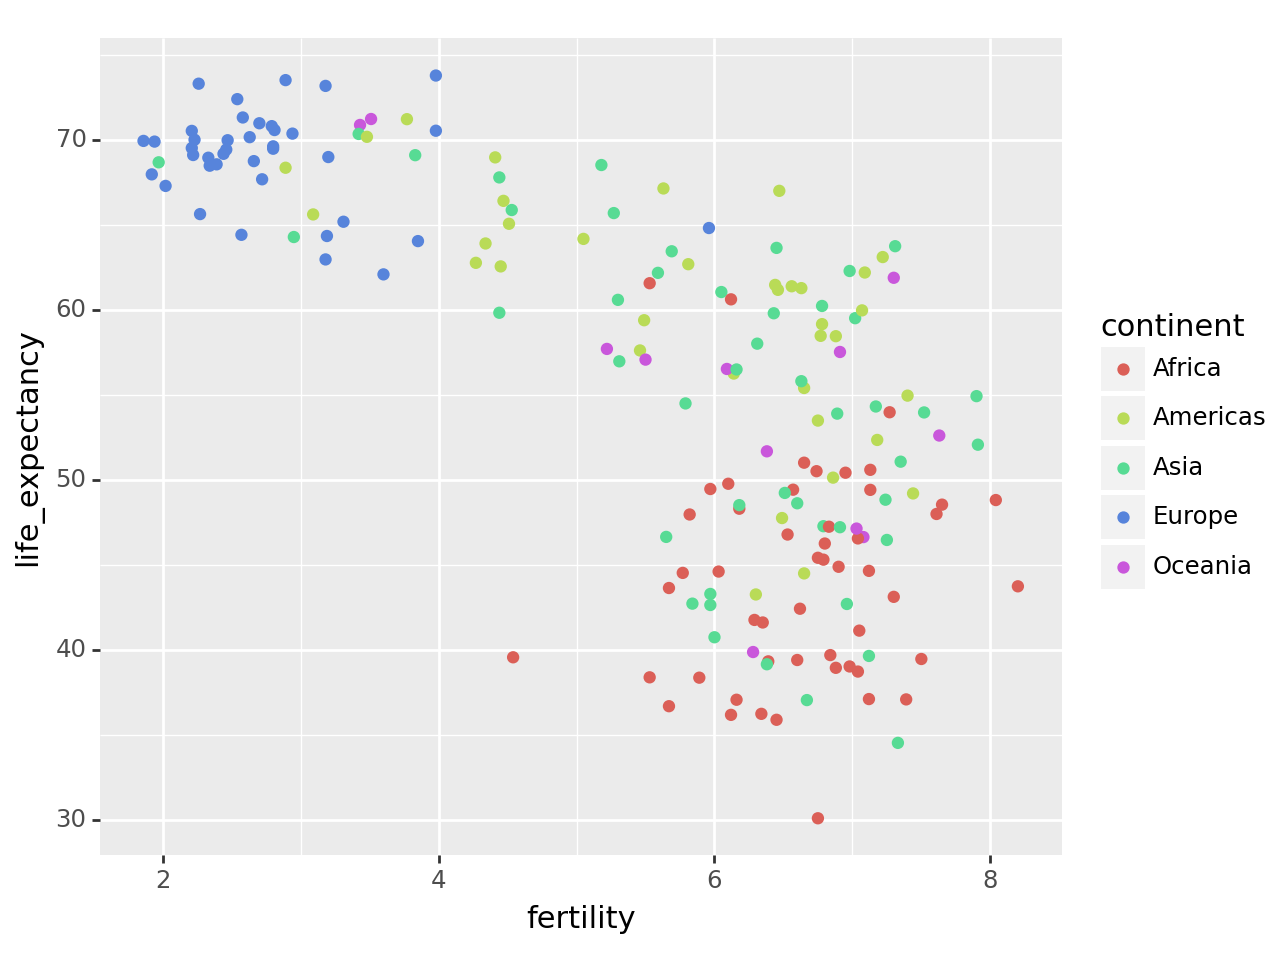

<Figure Size: (640 x 480)>

In [109]:
# Back then, the west (US/EU) have better life expectancy.
ggplot(gapminder_1962, aes(x='fertility', y='life_expectancy', color='continent')) + geom_point()

### Comparing 1962 and 2012 (50 years later)
- We want to compare 1962 and 2012 data.
- Our plots are already crowded.
- We want to stratify the data by years.
- We can do that using `Facet`

### `facet_grid`

- We can add a new layer to separate plot into multiple subplots using `facet_grid`
- **Syntax**: `facet_grid('row ~ column')`
  - One variable for row
  - One variable for column

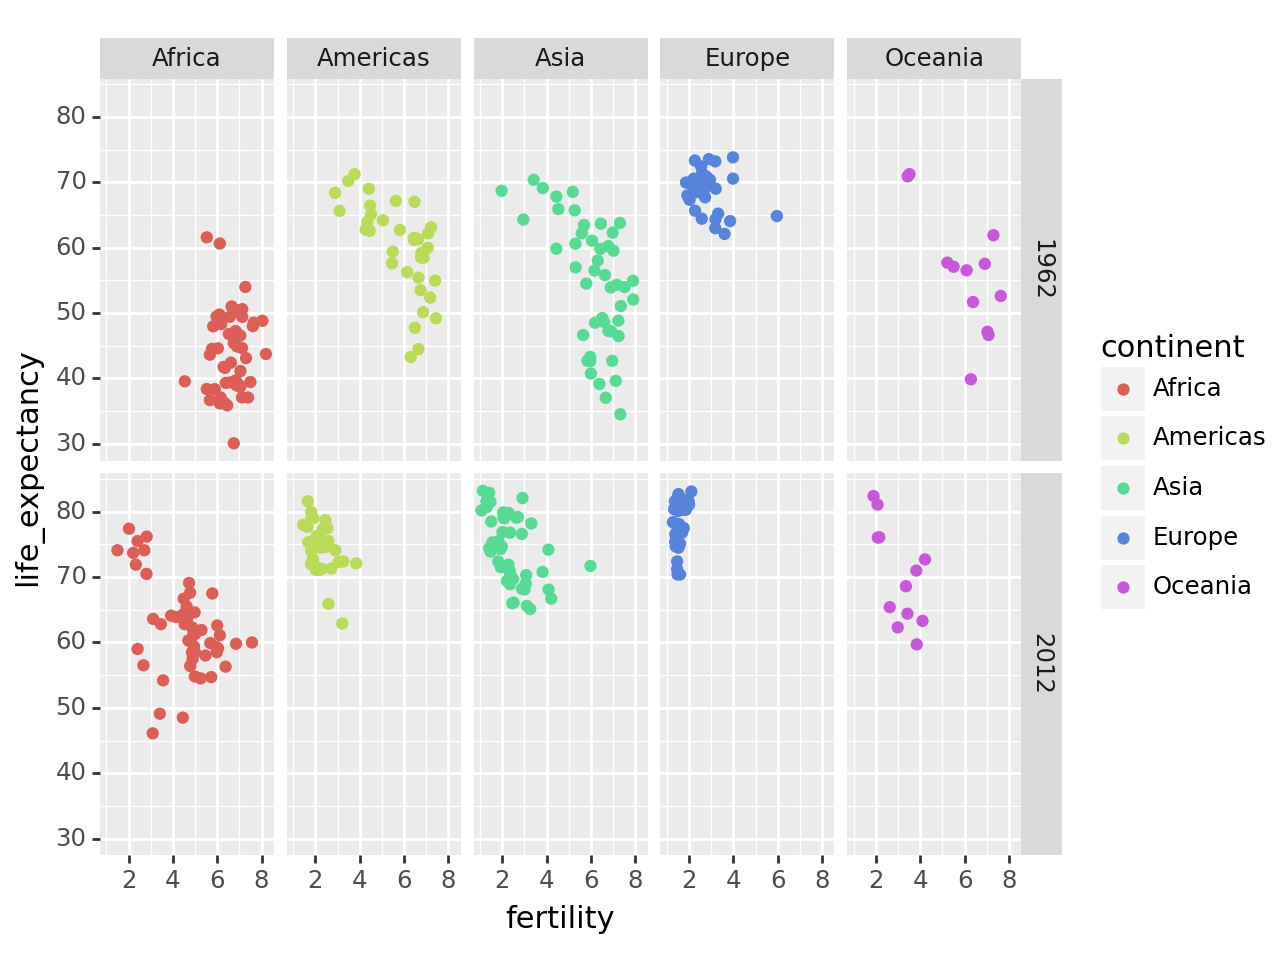

<Figure Size: (640 x 480)>

In [128]:
# First let's gap the data of only 1962 and 2012
gap_1962_2012 = gapminder[gapminder['year'].isin([1962,2012])]
base_plot = (
              ggplot(gap_1962_2012,
                     aes(x='fertility',
                         y='life_expectancy',
                         color='continent')) +
              geom_point()
            )
base_plot + facet_grid('year ~ continent')

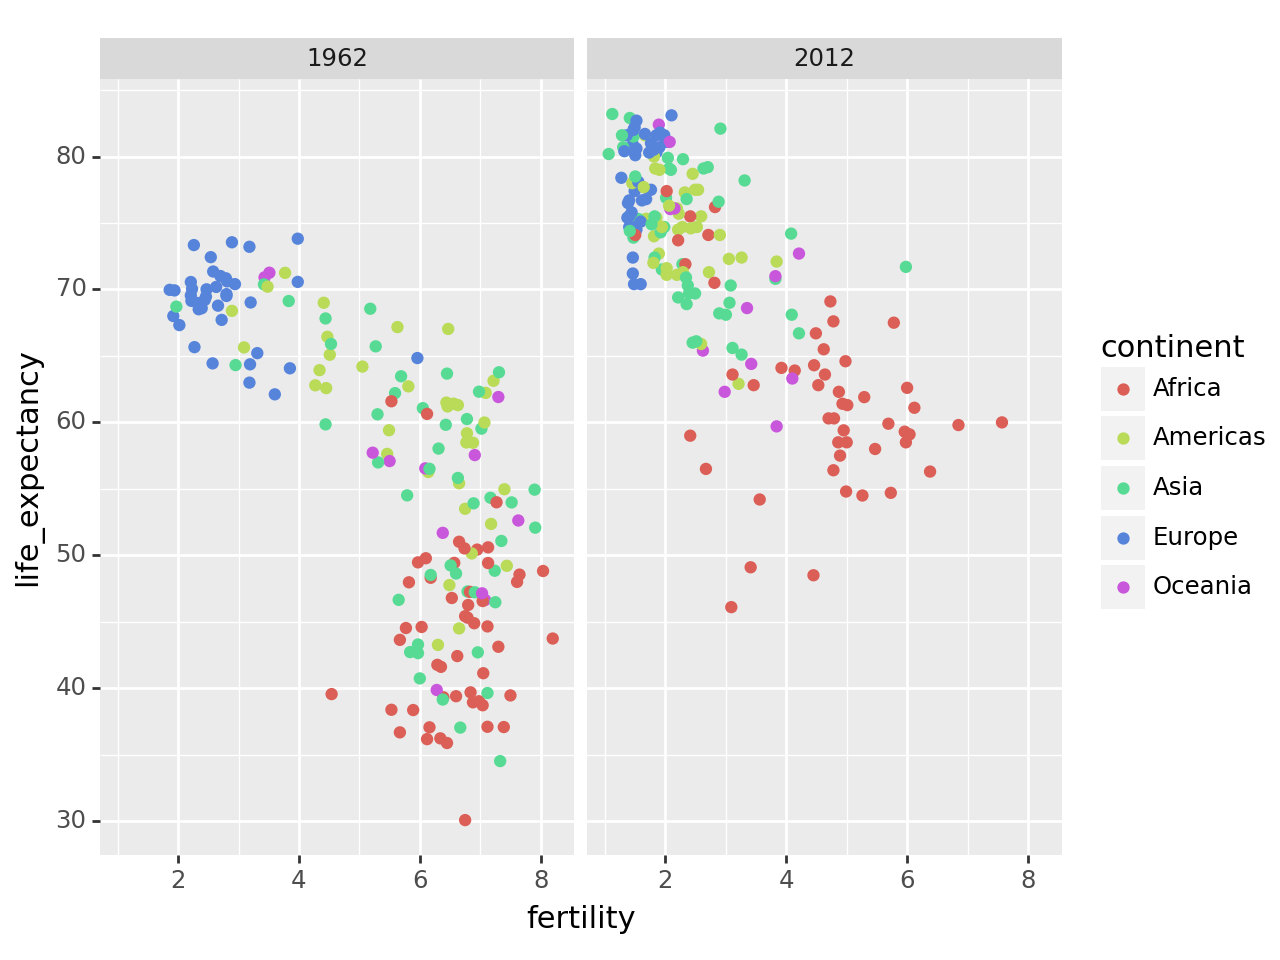

<Figure Size: (640 x 480)>

In [123]:
# We only want to compare 1962 vs. 2012
base_plot + facet_grid('. ~ year') # . for not using the other variable

#### `facet_wrap`
- To explore how this transformation happened through the years, we can make the plot for several years.
- `facet_grid` only allow a row/column for a variable
- `facet_wrap` only us to control the number of columns

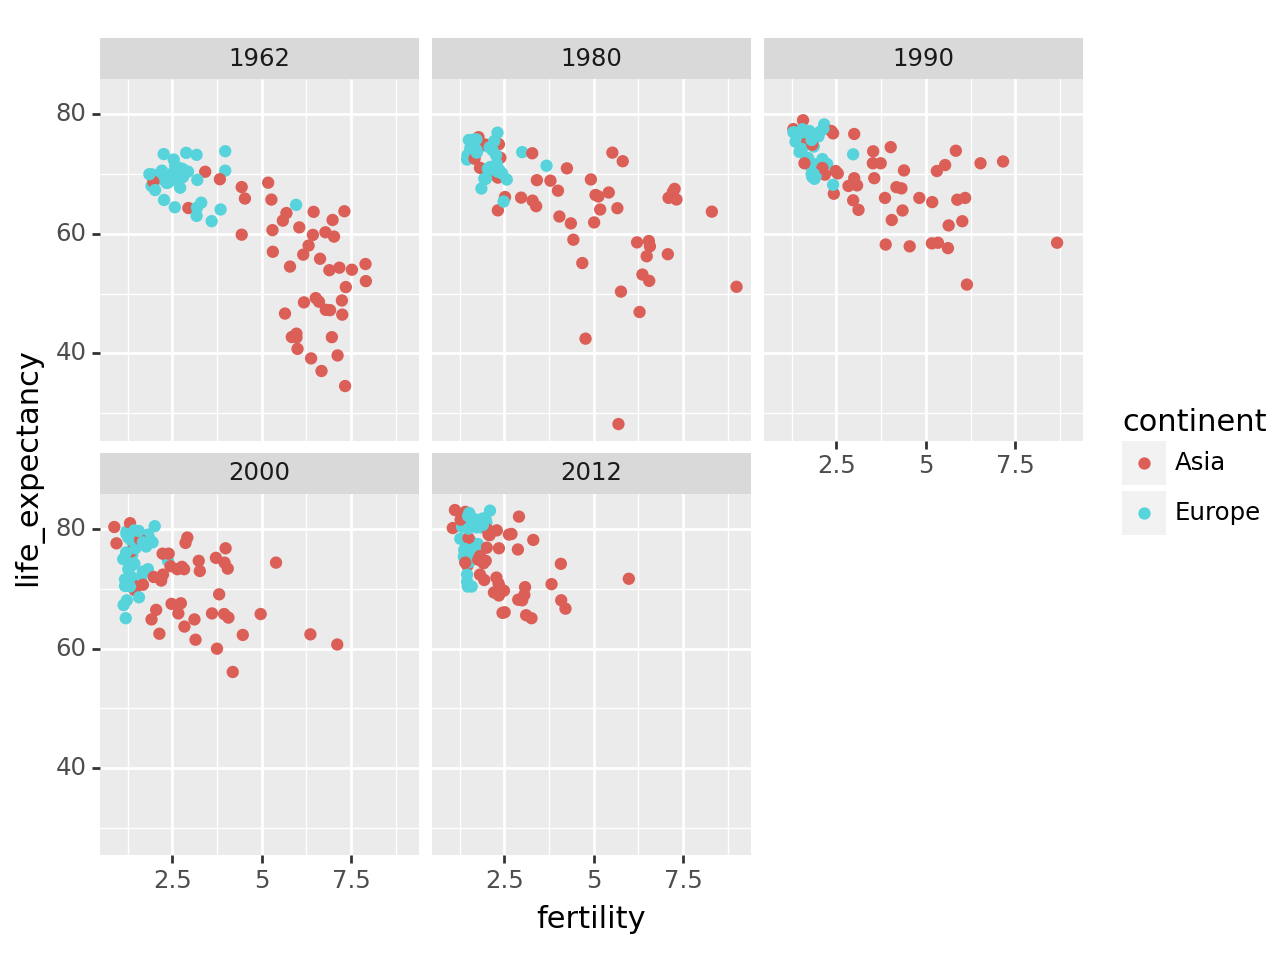

<Figure Size: (640 x 480)>

In [127]:
# First let's gap the data of from 1962 to 2012
years = [1962, 1980, 1990, 2000, 2012]
continents = ['Europe','Asia']
gap_1962to2012 = gapminder[(gapminder['year'].isin(years) &
                            gapminder['continent'].isin(continents))]
(
  ggplot(gap_1962to2012,
         aes(x='fertility', y='life_expectancy', color='continent')) +
         geom_point() +
         facet_wrap('~year')
)

#### Fixed scales for better comparisons
- By default, `facet_grid` and `facet_wrap` fix all the scale to be the same.
- We want this for easier comparison.

### Time Series Plots
- We want to plot trend over time.
- We want to see how countries improve over time.
- Time Seires plots = x-axis is time (year in this case)`.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


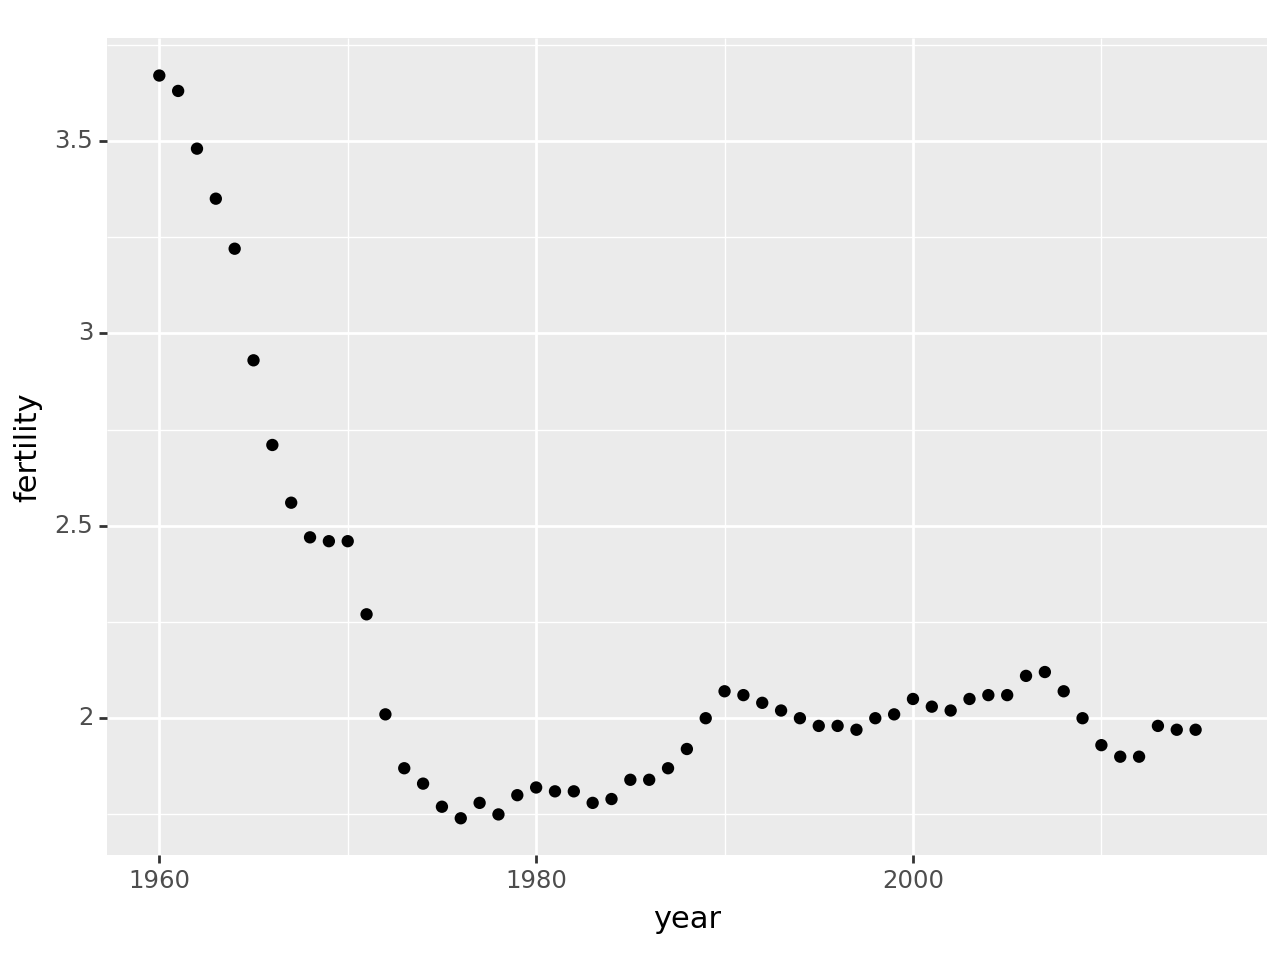

<Figure Size: (640 x 480)>

In [132]:
# Let's check US
(
  ggplot(gapminder[gapminder['country']=='United States'],
       aes('year','fertility')) +
  geom_point()
)

#### 'geom_line'
- When the points are regularly and densely spaced, as they are here, we create curves by joining the points with lines.
- We can do so using 'geom_line'

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


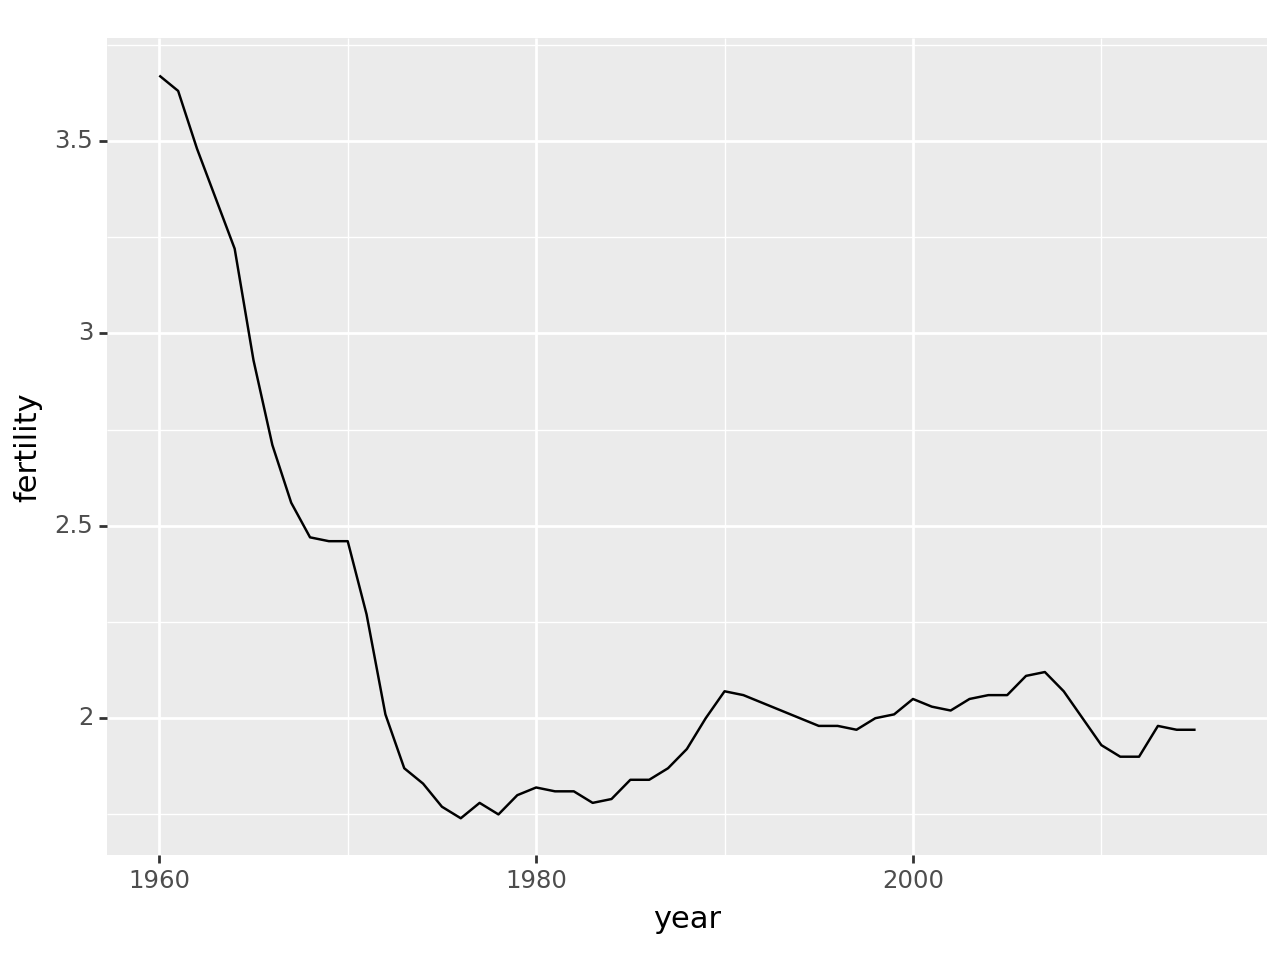

<Figure Size: (640 x 480)>

In [133]:
(
    ggplot(gapminder[gapminder['country']=='United States'],
       aes('year','fertility')) +
       geom_line()
)

- Next, we want to look at two countries, say 'Thailand' and 'Germany'.

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


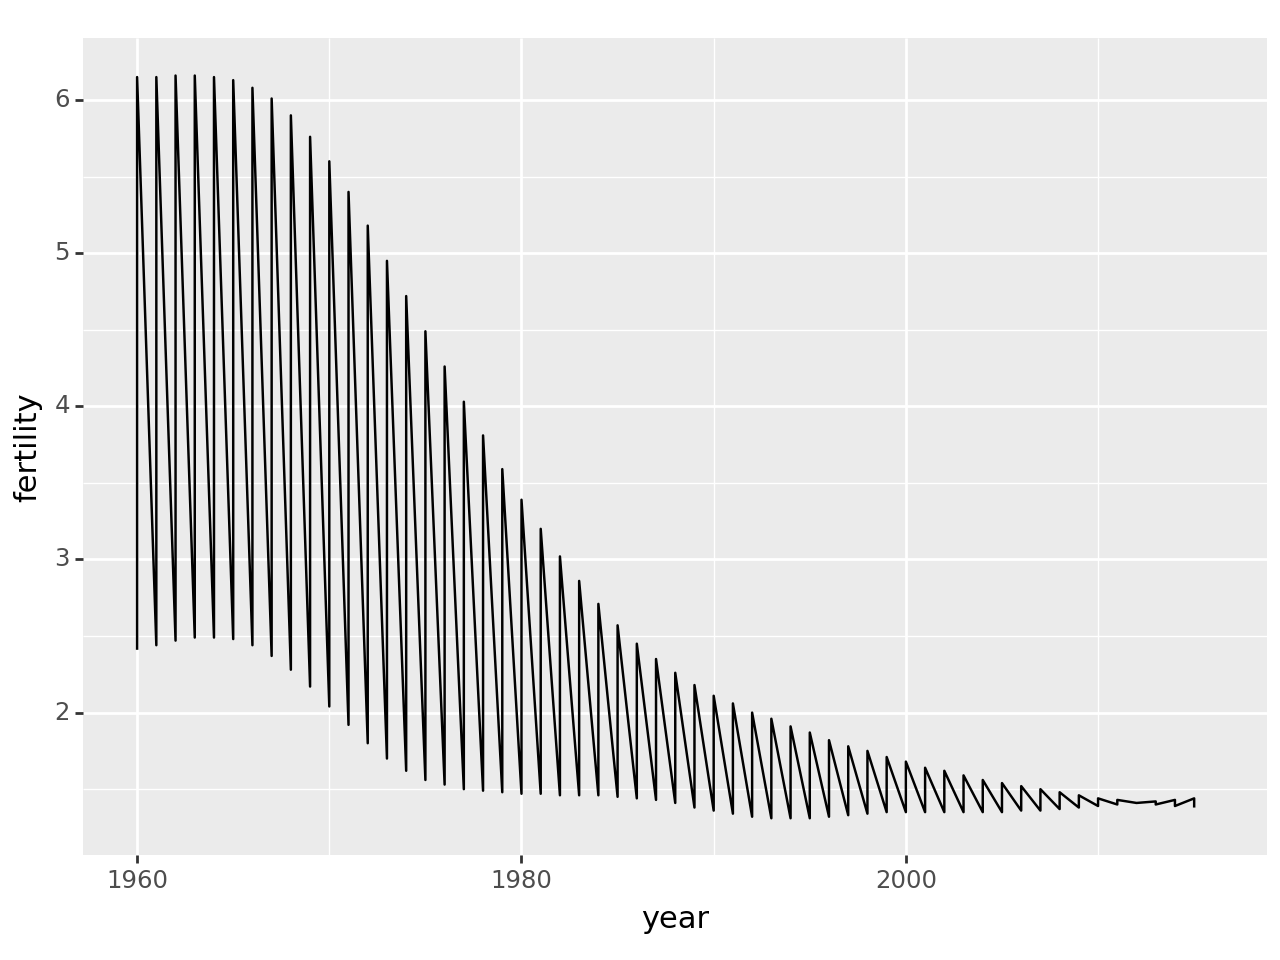

<Figure Size: (640 x 480)>

In [134]:
gap_Thai_Ger = gapminder[gapminder['country'].isin(['Thailand','Germany'])]

ggplot(gap_Thai_Ger, aes('year','fertility')) + geom_line()

- This is not what we want. We haven't told plotnine that there are two groups!
- Don't forget to assign group (and/or color, fill)

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


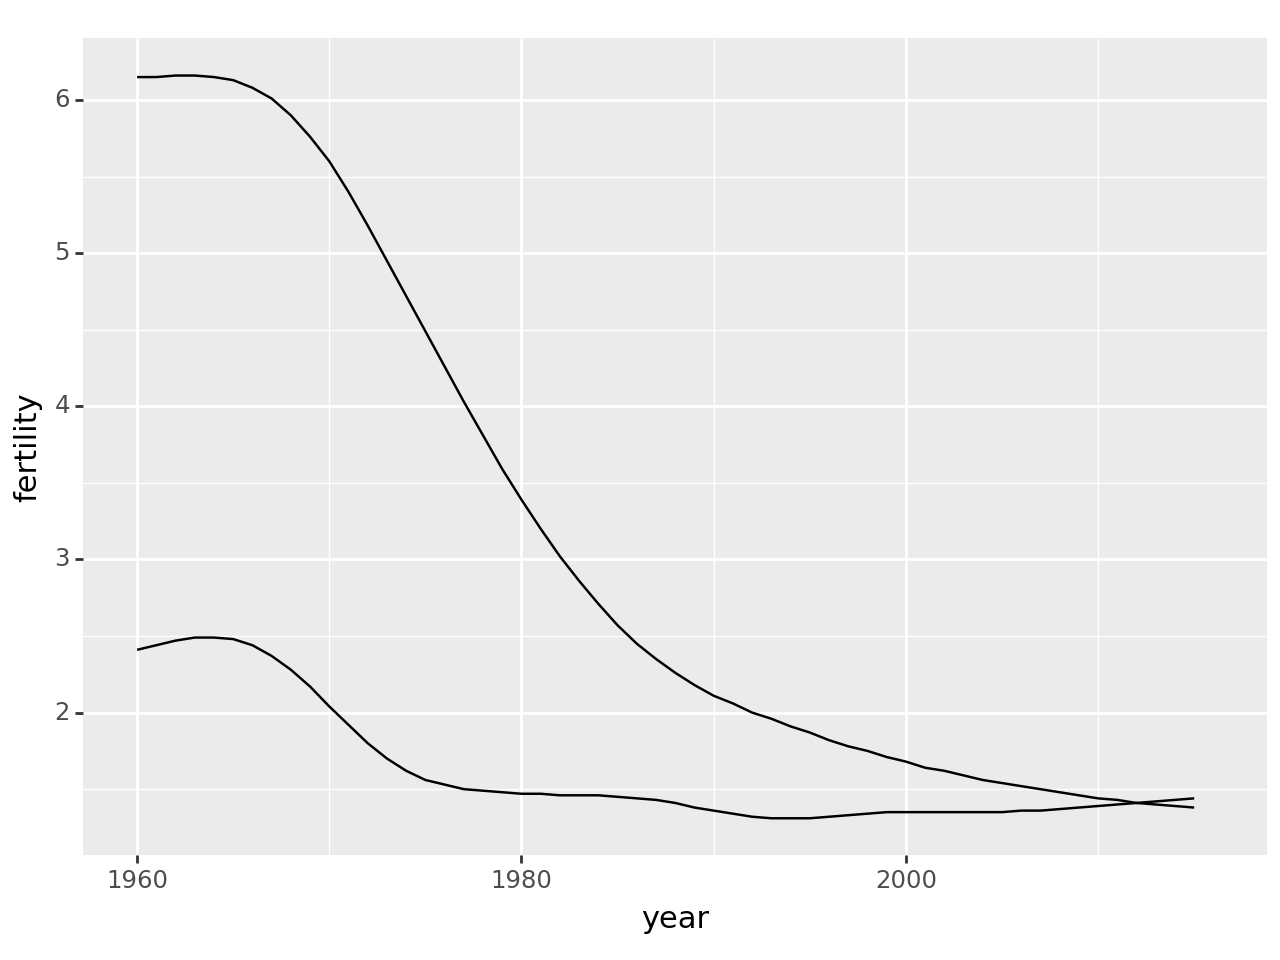

<Figure Size: (640 x 480)>

In [135]:
ggplot(gap_Thai_Ger, aes('year','fertility', group = 'country')) + geom_line()

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


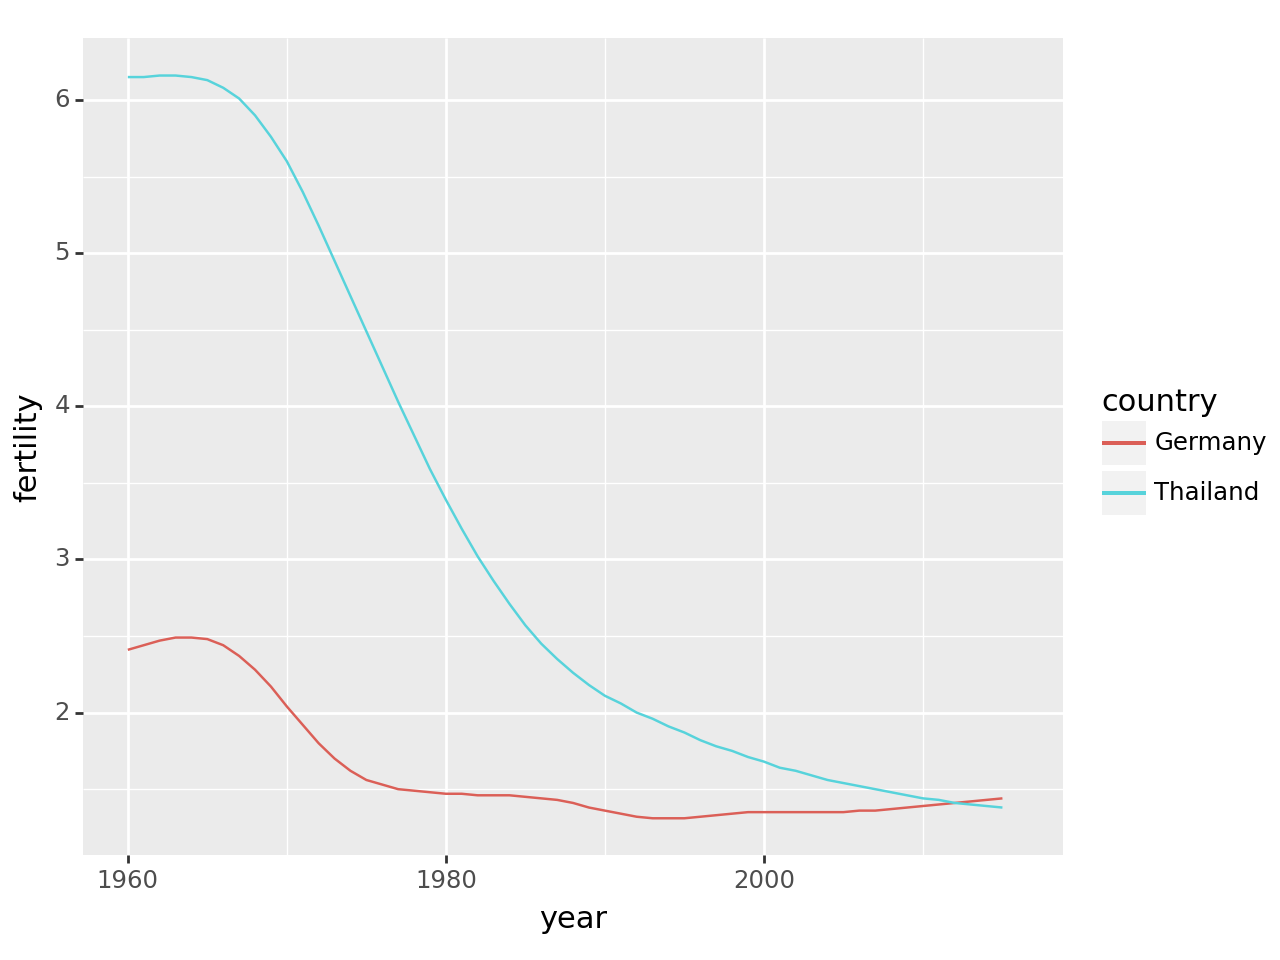

<Figure Size: (640 x 480)>

In [136]:
ggplot(gap_Thai_Ger, aes('year','fertility', color = 'country')) + geom_line()

- As we discussed, labelling is ususally better than legends.
- We will do two things:
  - Add text using `geom_text`
  - Remove legends using `theme(legend_position = "none")`

#### `geom_text`
- `geom_text` is similar to `geom_point` but it has an additional aesthetic: `label`
- `label` allows you to add textual labels at a specific position based on `x` and `y`
- This typically means you will need to create a new DataFrame for it.

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


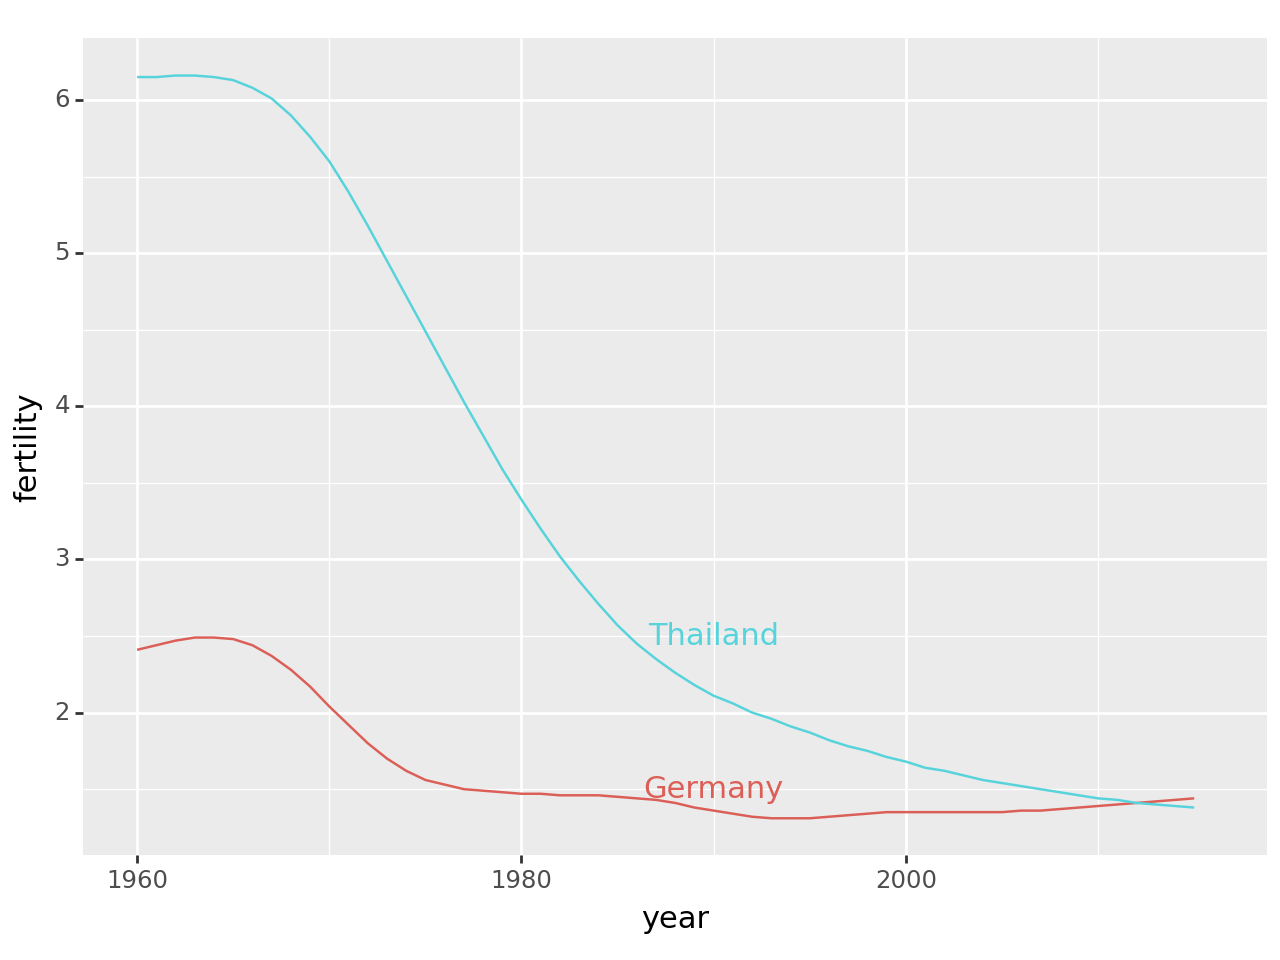

<Figure Size: (640 x 480)>

In [141]:
label_info = {'country': ['Thailand','Germany'],
              'x':[1990, 1990],
              'y':[2.5, 1.5]}
label_info = pd.DataFrame(label_info)

(
    ggplot(gap_Thai_Ger, aes('year','fertility', color = 'country')) +
    geom_line() +
    geom_text(data = label_info, mapping = aes(label='country',x='x',y='y')) +
    theme(legend_position = "none")
)

- If we want y-axis to include 0, we can use `ylim([ymin, ymax])`

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


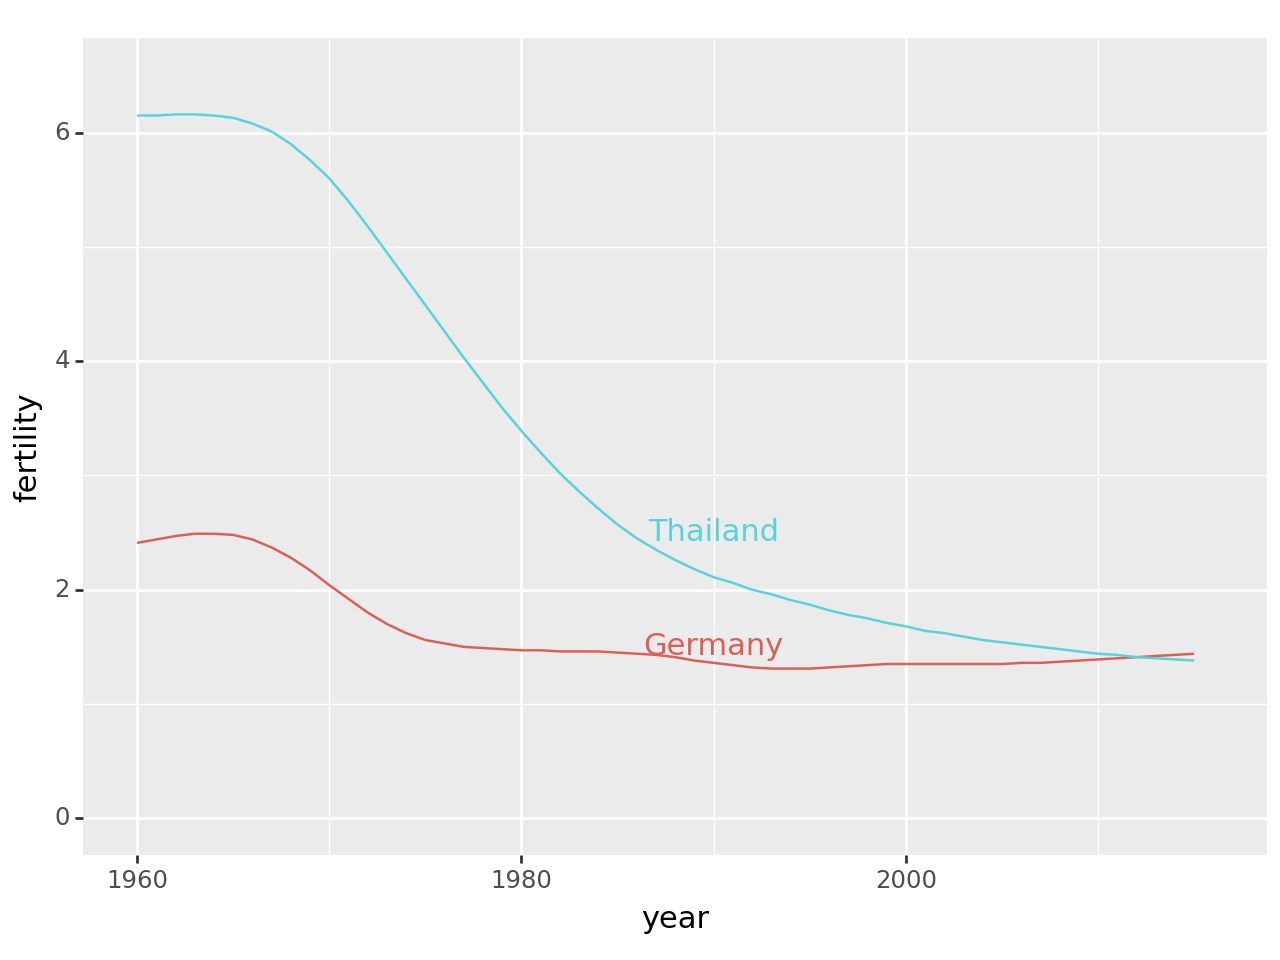

<Figure Size: (640 x 480)>

In [143]:
(
    ggplot(gap_Thai_Ger, aes('year','fertility', color = 'country')) +
    geom_line() +
    geom_text(data = label_info, mapping = aes(label='country',x='x',y='y')) +
    theme(legend_position = "none") +
    ylim(0, 6.5) # Add ylimit
)

### Data Transformations
- 2nd qustion: Has income inequality across countries worsened during the last 40 years?
- Q: Does rich countries get richer and poor countries aget poorer?
- `gapminder` includes a variable gross domestic product (GDP), `GDP`, measures the market value of goods and services produced by a country in a year.
- GDP per person: GDP/Population
- Dollars per day: (GDP/Population)/365
- **Transform data to make the data and graph easier to understand.**

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 72 rows containing non-finite values.


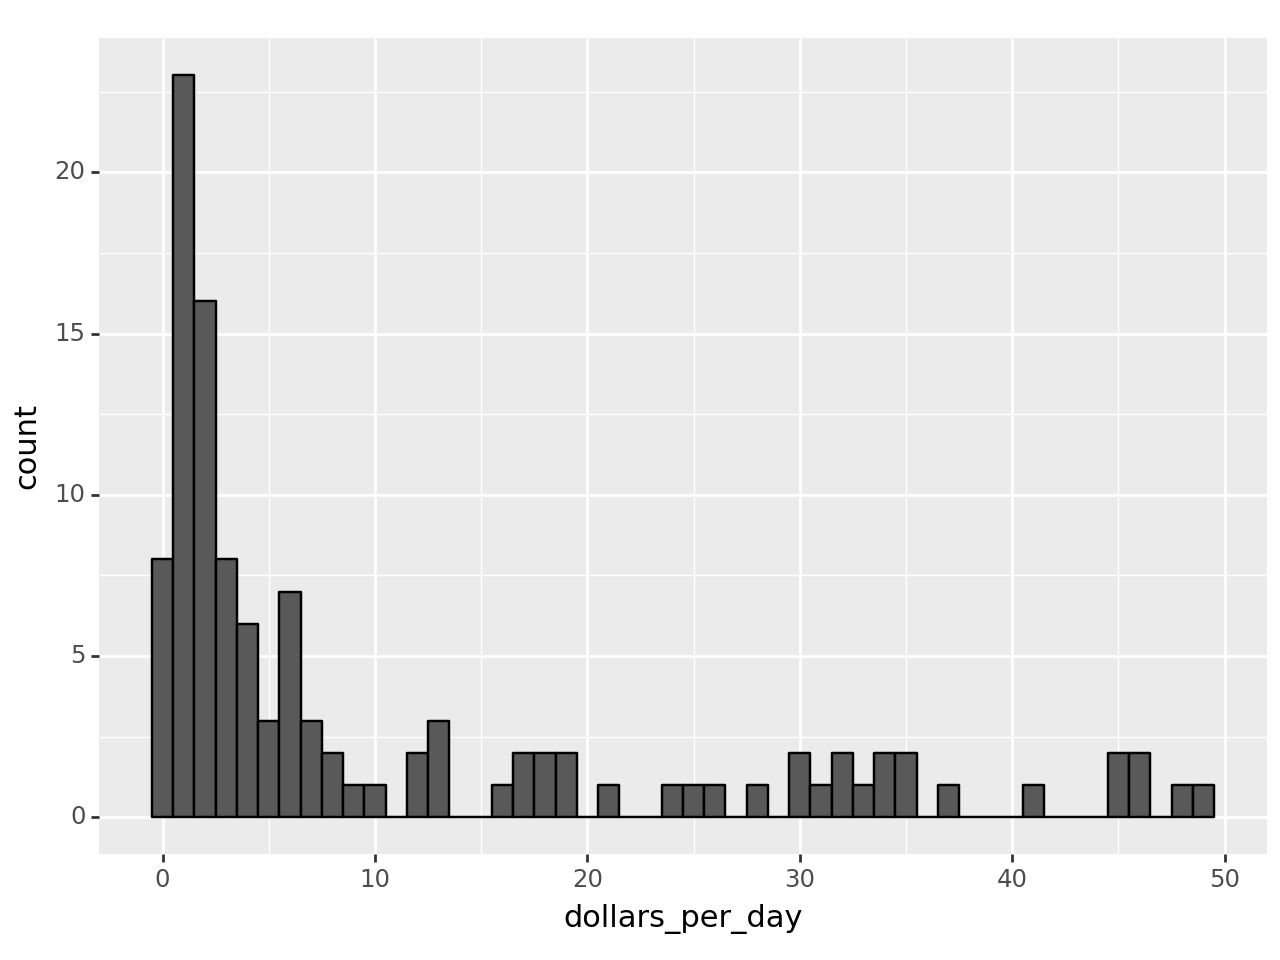

<Figure Size: (640 x 480)>

In [151]:
# Adding a new column
gapminder['dollars_per_day'] = gapminder['gdp']/gapminder['population']/365

(
  ggplot(gapminder[gapminder['year']==1970], aes('dollars_per_day')) +
  geom_histogram(binwidth = 1, color = "black")
)

#### Log Transformation
- In the previous plot, most countries are below \$10 a day and some are above \$10.
- It maybe more informative to look at how many countries have average daily incomes of about \$1 (extremely poor), \$2 (very poor), \$4 (poor), \$8 (middle), \$16 (well off), \$32 (rich), \$64 (very rich) per day.
- These changes are **multiplicative**, and **log transformations convert multiplicative changes into additive ones**: when using base 2, a doubling of a value turns into an increase by 1.
- The base will depend on context. log10 is a common one.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 72 rows containing non-finite values.


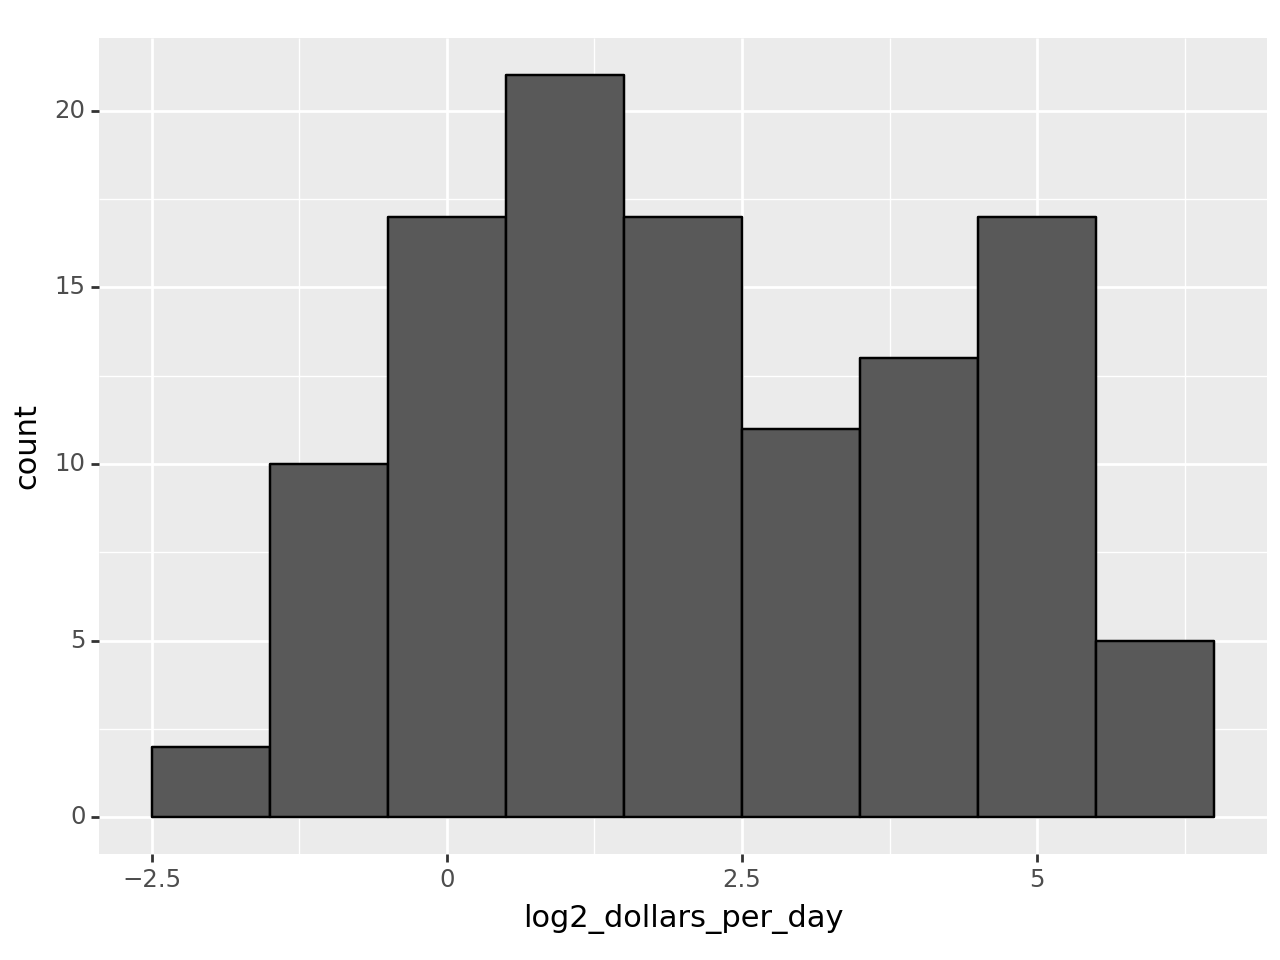

<Figure Size: (640 x 480)>

In [152]:
# Adding a new column for log2
gapminder['log2_dollars_per_day'] = np.log2(gapminder['dollars_per_day'])

(
  ggplot(gapminder[gapminder['year']==1970], aes('log2_dollars_per_day')) +
  geom_histogram(binwidth = 1, color = "black")
)

#### Transform the values or the scale?

- Two ways we can use log transformations in plots:
  - Use the log scale (last plot)
  - Use the original scale
- We can use `scale_x_continuous(trans = 'log2)` to transform the data but still use the original scale.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 72 rows containing non-finite values.


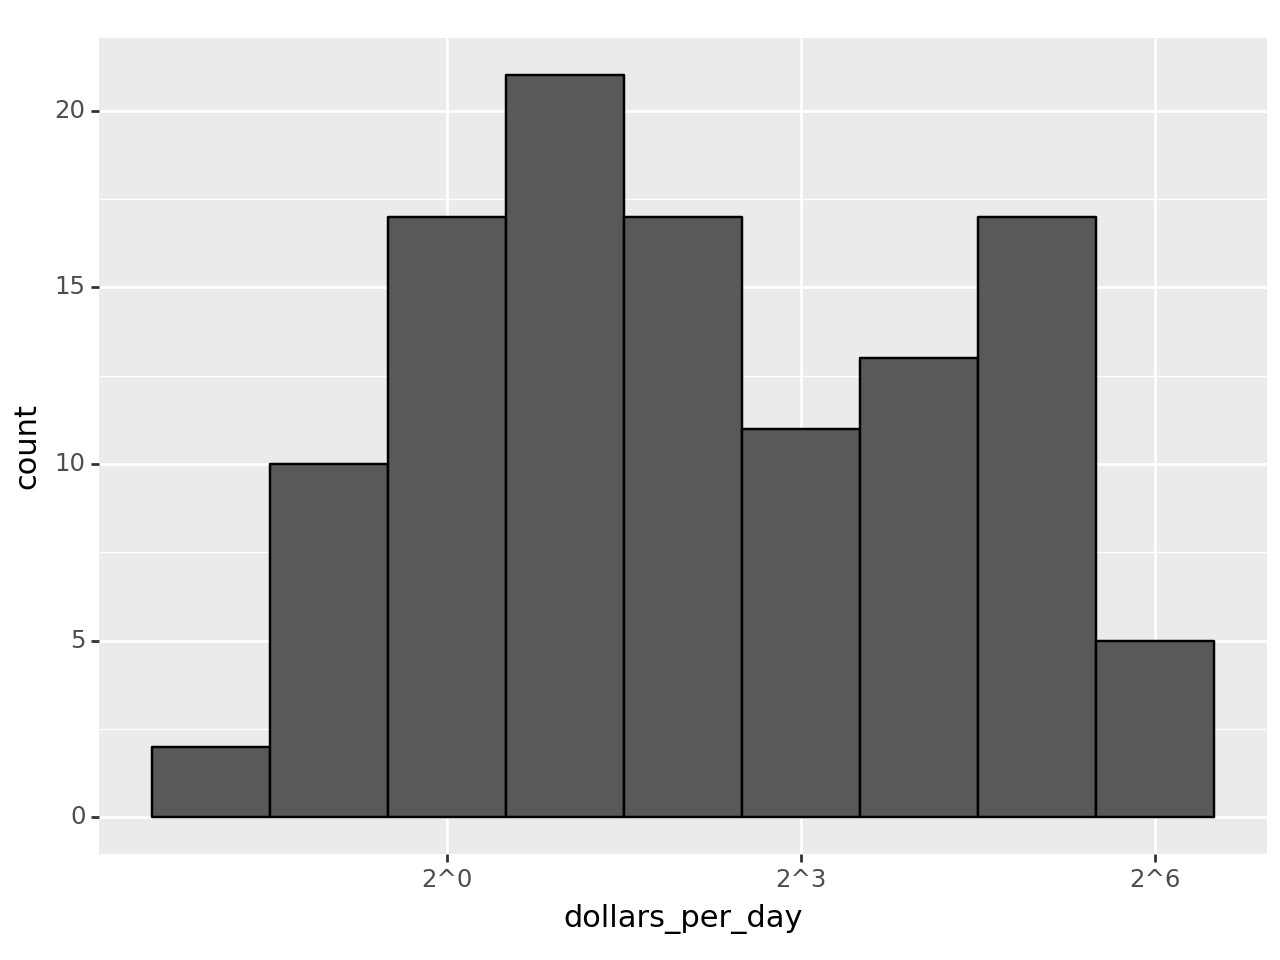

<Figure Size: (640 x 480)>

In [153]:
(
  ggplot(gapminder[gapminder['year']==1970], aes('dollars_per_day')) +
  geom_histogram(binwidth = 1, color = "black") +
  scale_x_continuous(trans = "log2")
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 72 rows containing non-finite values.


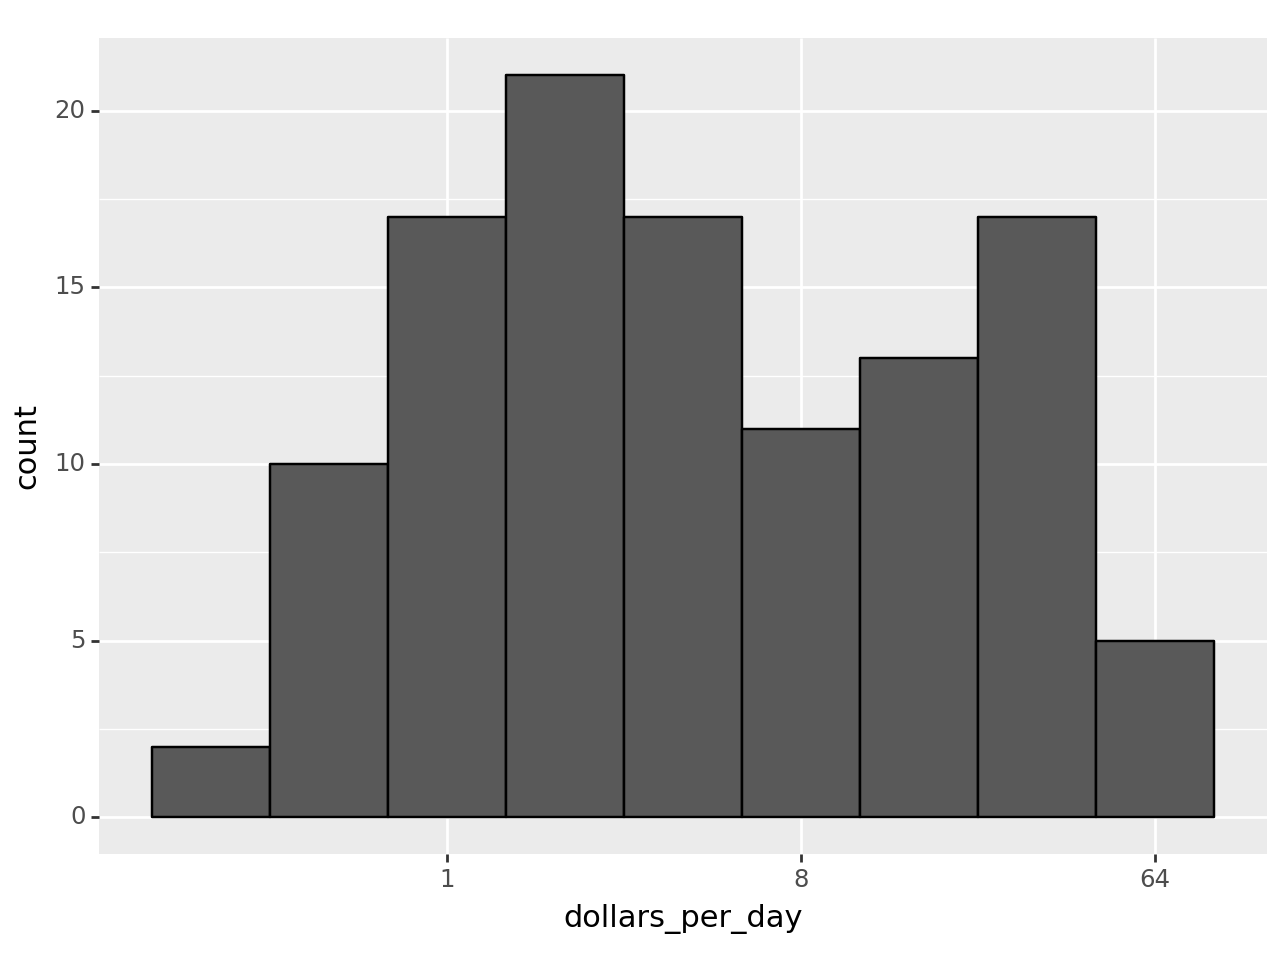

<Figure Size: (640 x 480)>

In [154]:
# Update the labels (see https://plotnine.org/reference/scale_x_continuous.html)
(
  ggplot(gapminder[gapminder['year']==1970], aes('dollars_per_day')) +
  geom_histogram(binwidth = 1, color = "black") +
  scale_x_continuous(trans = "log2", labels=[1, 8, 64])
)

#### Comparing distributions between 1970 and 2010

- We want to compare the change in wealth between west vs. the *developing* world.
- Let's start by quickly examining the data by region.

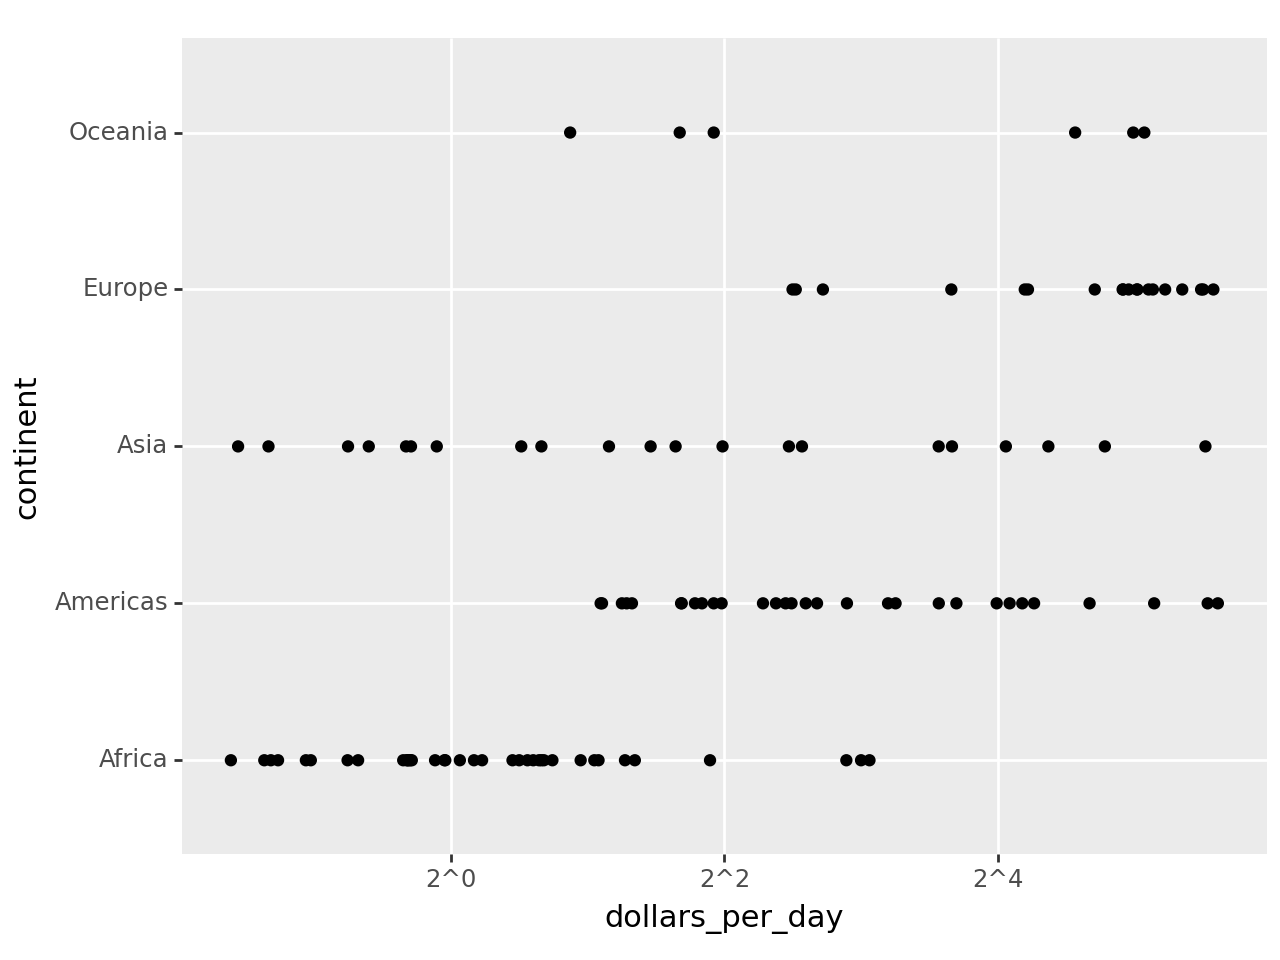

<Figure Size: (640 x 480)>

In [161]:
past_year = 1970
# Filter by past year and not na (NaN)
filtered_df = gapminder[(gapminder['year'] == past_year) & (gapminder['gdp'].notna())]

(
    ggplot(filtered_df, aes('dollars_per_day', 'continent'))
    + geom_point()
    + scale_x_continuous(trans = "log2")
)

In [166]:
gapminder['region'].unique()

array(['Southern Europe', 'Northern Africa', 'Middle Africa', 'Caribbean',
       'South America', 'Western Asia', 'Australia and New Zealand',
       'Western Europe', 'Southern Asia', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Polynesia',
       'Central Asia', 'Micronesia'], dtype=object)

#### Creating a new group for region
- We want a new group for west and *developing* countries.

New Groups:
- West = 'Europe' except 'Eastern Europe' + 'North America' + 'Australia and New Zealand'.
- East Asia = 'Eastern Asia'
- Rest of Asia = Asia - East Asia
- Latin America = 'Caribbean' + 'Central America' + 'South America'
- Sub sahara = All 'Africa' except `Northern Africa`
- Others = the rest

In [168]:
# Step 1: Create a new 'group' column with default value 'Others'
gapminder['group'] = 'Others'

# West
west_regions = ['Western Europe', 'Northern Europe', 'Southern Europe',
                'Northern America', 'Australia and New Zealand']
gapminder.loc[gapminder['region'].isin(west_regions), 'group'] = 'West'

# East Asia
east_asia_regions = ['Eastern Asia']
gapminder.loc[gapminder['region'].isin(east_asia_regions), 'group'] = 'East Asia'

# Asia
asia_regions = ['South-Eastern Asia','Western Asia','Southern Asia','Central Asia']
gapminder.loc[gapminder['region'].isin(asia_regions), 'group'] = 'Asia'

# Latin America
latin_america_regions = ['Caribbean', 'Central America', 'South America']
gapminder.loc[gapminder['region'].isin(latin_america_regions), 'group'] = 'Latin America'

# 'Sub-Saharan' to African countries not in Northern Africa
gapminder.loc[(gapminder['continent'] == 'Africa') &
              (gapminder['region'] != 'Northern Africa'), 'group'] = 'Sub-Saharan'

# Let check the number
gapminder.groupby(['group','region']).size()

group          region                   
Asia           Central Asia                  285
               South-Eastern Asia            570
               Southern Asia                 456
               Western Asia                 1026
East Asia      Eastern Asia                  342
Latin America  Caribbean                     741
               Central America               456
               South America                 684
Others         Eastern Europe                570
               Melanesia                     285
               Micronesia                    114
               Northern Africa               342
               Polynesia                     171
Sub-Saharan    Eastern Africa                912
               Middle Africa                 456
               Southern Africa               285
               Western Africa                912
West           Australia and New Zealand     114
               Northern America              171
               Northern Europe               570
               Southern Europe               684
               Western Europe                399
dtype: int64

- We will use box plot to visualize the distribution.

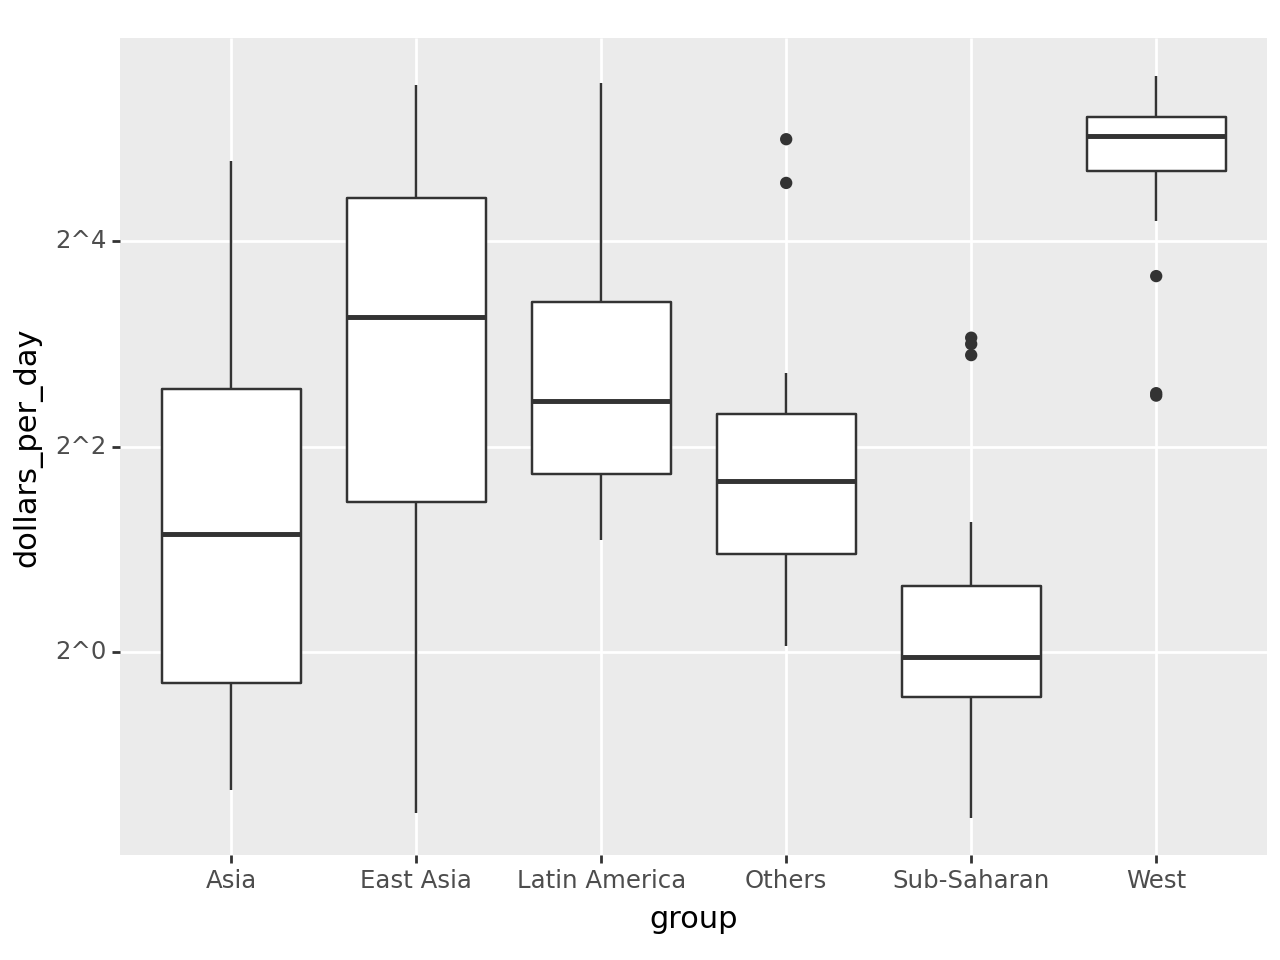

<Figure Size: (640 x 480)>

In [172]:
past_year = 1970
# Filter by past year and not na (NaN)
filtered_df = gapminder[(gapminder['year'] == past_year) & (gapminder['gdp'].notna())]

base_plot = (
              ggplot(filtered_df, aes('group', 'dollars_per_day'))
              + geom_boxplot()
              + scale_y_continuous(trans = "log2")
            )
base_plot

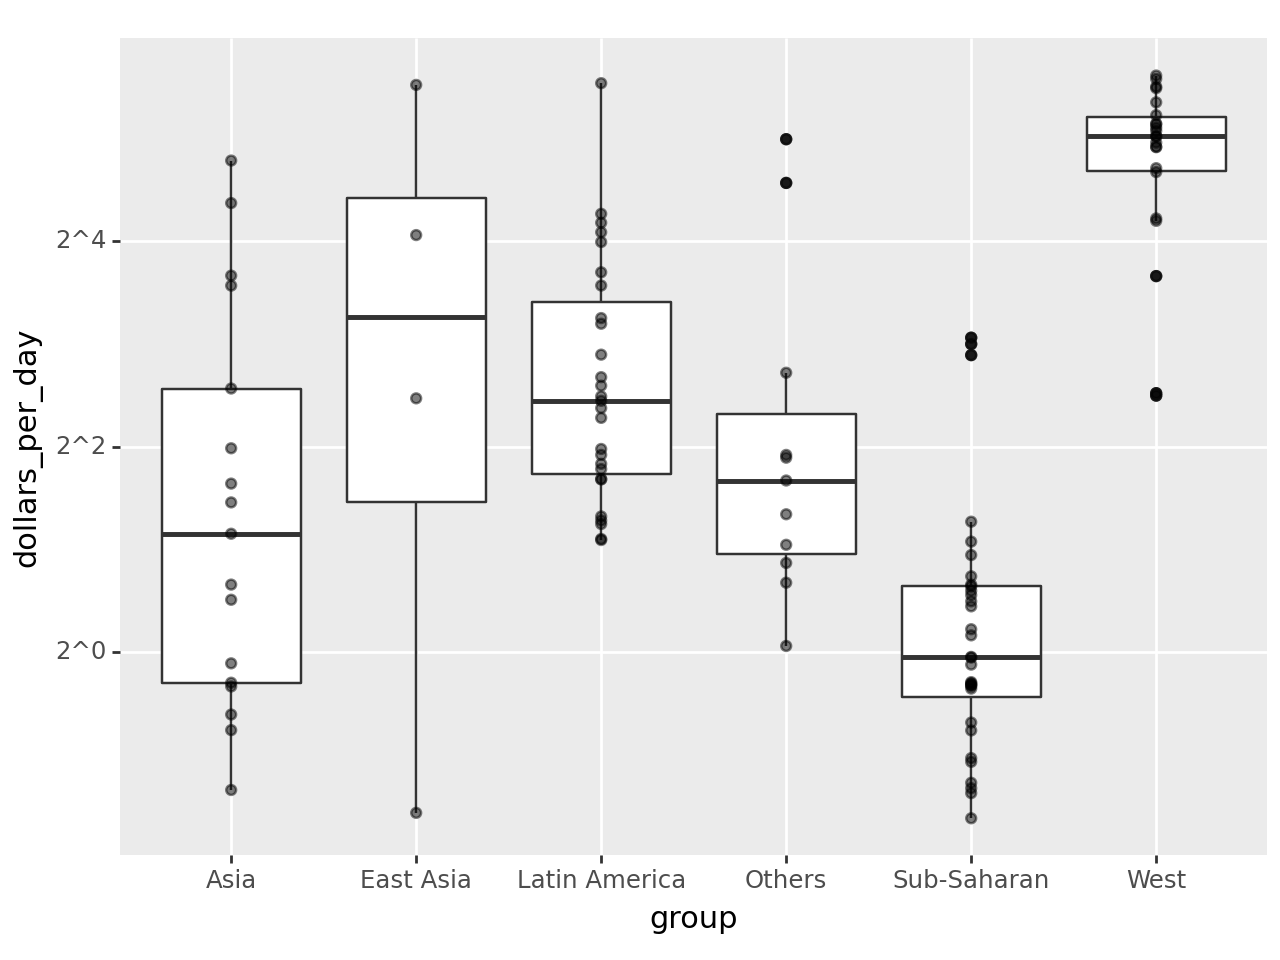

<Figure Size: (640 x 480)>

In [173]:
base_plot + geom_point(alpha=0.5)

- Now we want to compare between 1970 and 2010

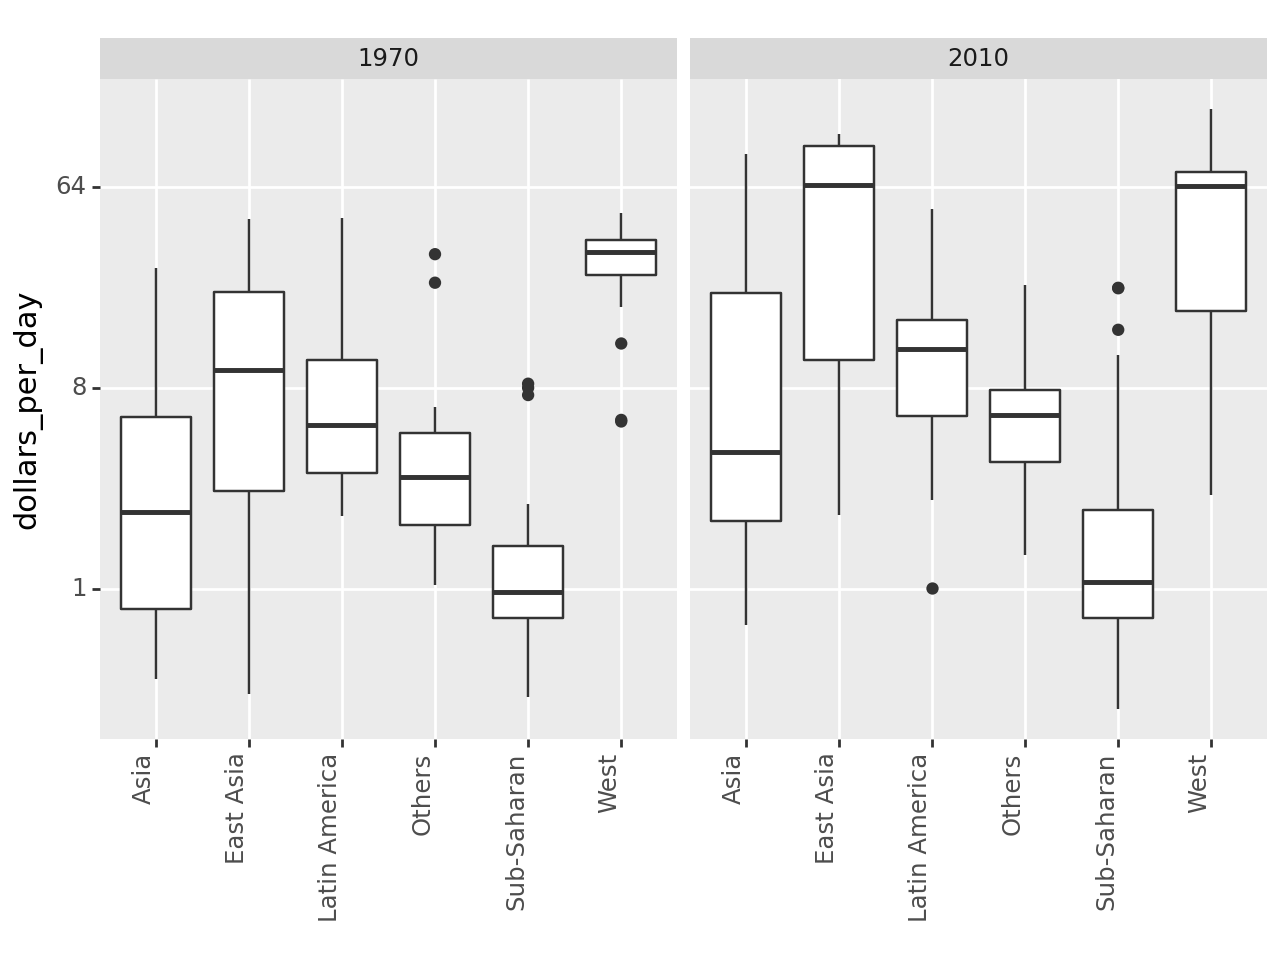

<Figure Size: (640 x 480)>

In [189]:
filtered_df = gapminder[(gapminder['year'].isin([1970, 2010])) & (gapminder['gdp'].notna())].copy()

(
   ggplot(filtered_df, aes('group', 'dollars_per_day')) +
   geom_boxplot() +
   scale_y_continuous(trans = "log2", labels=[1,8,64]) +
   theme(axis_text_x = element_text(angle = 90, hjust = 1)) +
   xlab("") +
   facet_grid('. ~ year')
)

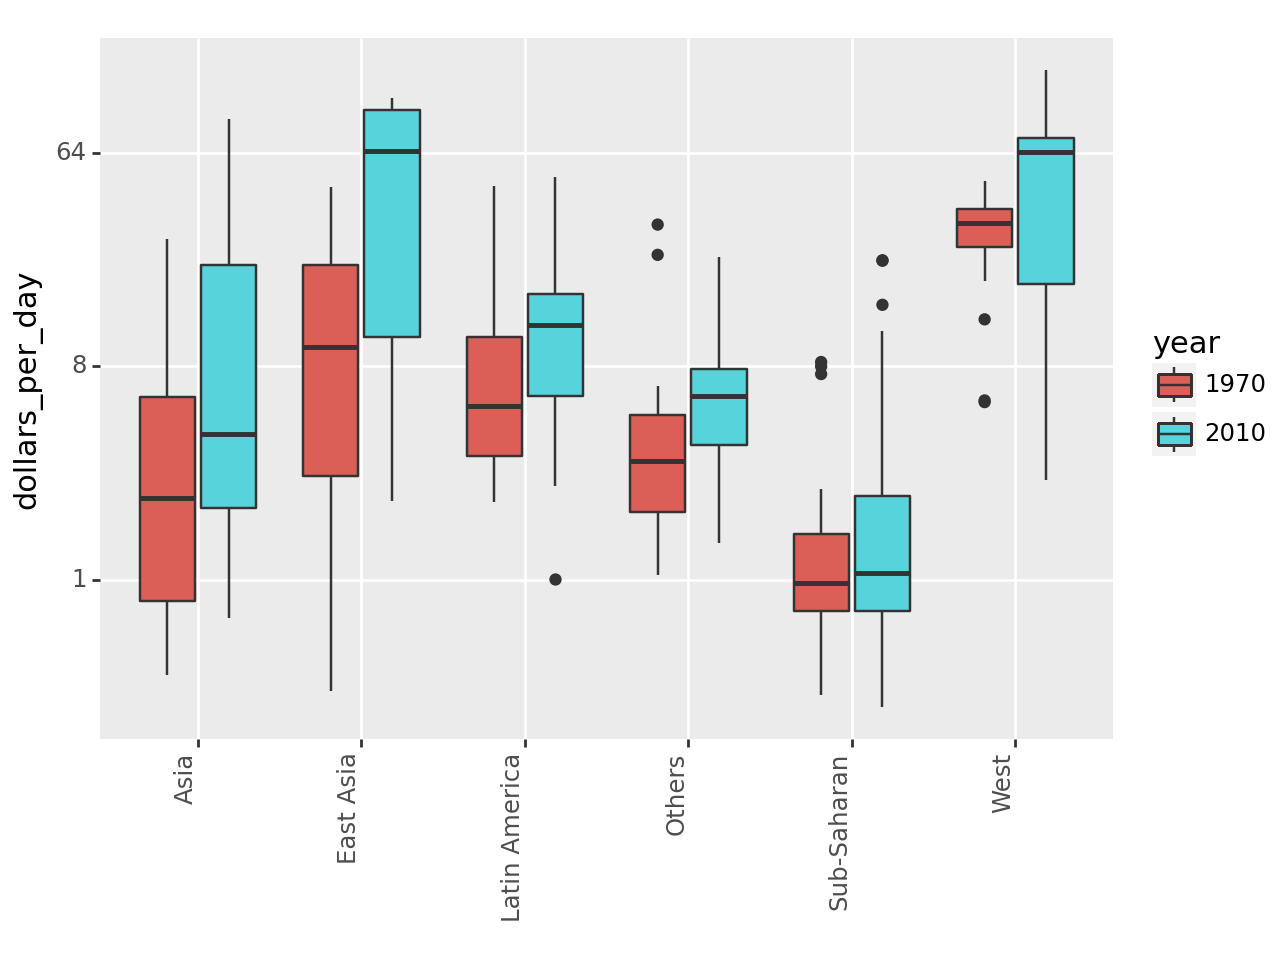

<Figure Size: (640 x 480)>

In [190]:
# The previous figure is hard to do a comparison
## Need to make 'year' into a categorical variable first.
filtered_df['year'] = filtered_df['year'].astype('category')

(
   ggplot(filtered_df, aes(x='group',y= 'dollars_per_day', fill = 'year')) +
   geom_boxplot() +
   scale_y_continuous(trans = "log2", labels=[1,8,64]) +
   theme(axis_text_x = element_text(angle = 90, hjust = 1)) +
   xlab("")
)

# ---- Break Here ----

## Exploratory Data Analysis

![function_flowchart.png](https://drive.google.com/uc?export=view&id=1z6IEkfwDGqra5pCUG4OauFF1NzZREgyg)

### EDA Opening Sentence



> It is important to understand what you CAN DO before you learn to measure how WELL you seem to have DONE it - John Tukey



### EDA Guiding Principles



> Exploratory data analysis is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those that we believe to be there. - John Tukey



### EDA Guiding Principles



> Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise. - John Tukey



### EDA cycle: All about questions



1. Generate questions about your data.

2. Search for answers by exploring, visualizing, transforming, and modelling your data.

3. Use what you learn to refine your questions, generate new questions, clean up your data, and/or acquire more data.



### Questions

- You want to ask **quality** questions.
- This depends on your **context**.
- Two common questions to ask/check:
  - What type of **variation** occurs **within** my variables?
  - What type of **covariation** occurs **between** my variables?

### Variation

- **Variation** is the tendency of the values of a variable to change from measurement to measurement.
- **Variation** = spread of your variables


### Diamond dataset
- We will explore by visualizing the distribution of weights (`carat`) of ~54,000 diamons from the `diamond` dataset.
- We can download `diamond` dataset from the Plotnine library.

In [5]:
# Let's import all necessary library
import pandas as pd
from plotnine import *
from plotnine.data import diamonds   # import from plotnine

In [7]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
help(diamonds)  # Let's check the detail first (This one comes with the library so you can do this.)

Help on DataFrame in module pandas.core.frame:

       carat        cut color clarity  depth  ta...2757  5.83  5.87  3.64

[53940 rows x 10 columns]
    Prices of 50,000 round cut diamonds
    
    .. rubric:: Description
    
    A dataset containing the prices and other attributes
    of almost 54,000 diamonds. The variables are as follows:
    
    .. rubric:: Format
    
    A data frame with 53940 rows and 10 variables:
    
    ========  ==================================
    Column    Description
    ========  ==================================
    price     price in US dollars ($326–$18,823)
    carat     weight of the diamond (0.2–5.01)
    cut       quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color     diamond colour, from J (worst) to D (best)
    clarity   a measurement of how clear the diamond is 
    
              (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))
    x         length in mm (0–10.74)
    y         width in mm (0–58.9)
    z       

- carat is a numerical variable, so we can use a histogram

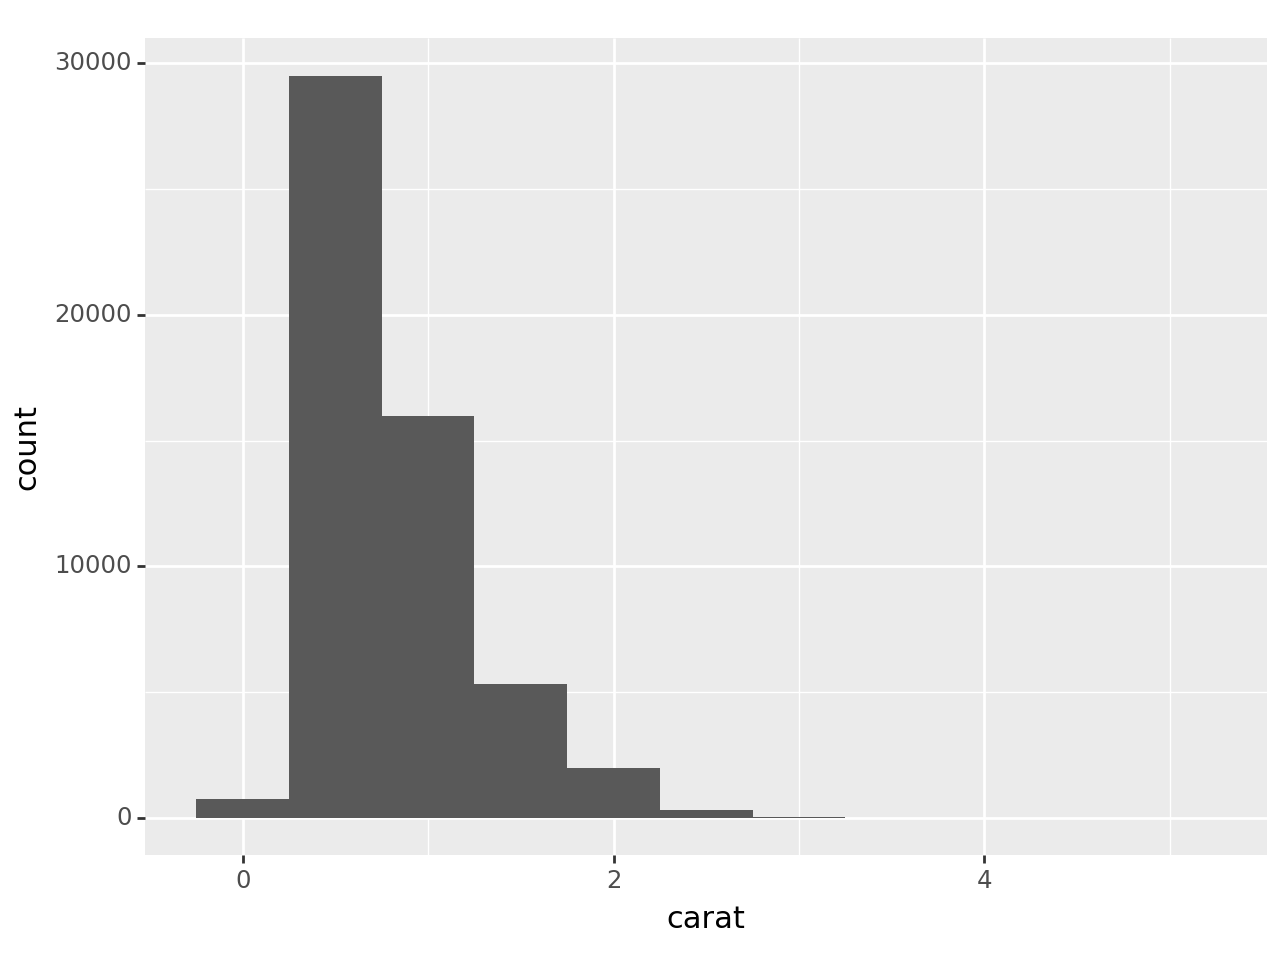

<Figure Size: (640 x 480)>

In [10]:
# range is between 0.2 - 5.01
ggplot(data = diamonds, mapping = aes(x = 'carat')) + geom_histogram(binwidth = 0.5)

### **Questions**: Typical values

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

- Let's look at smaller diamons first.

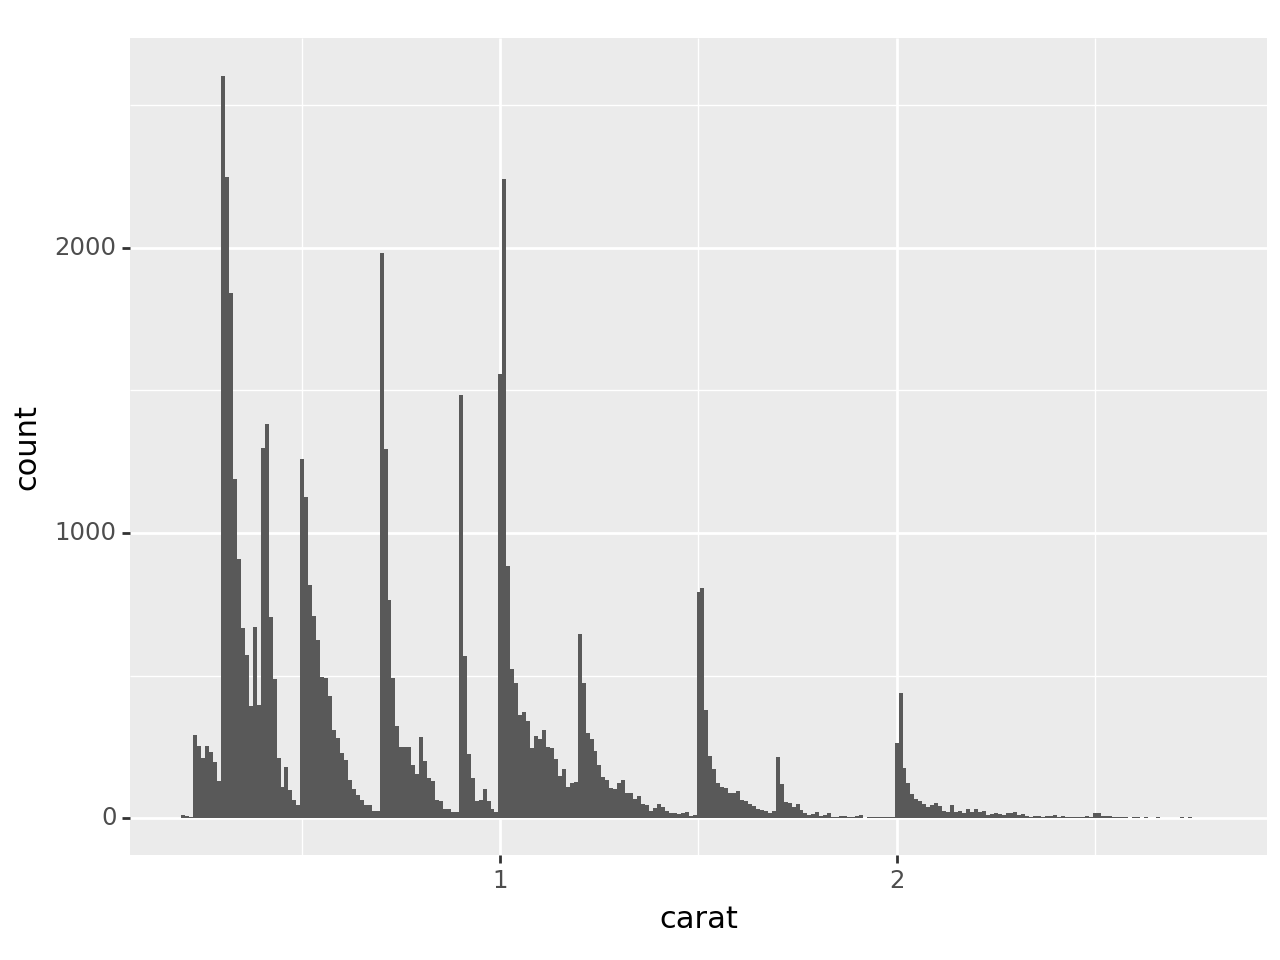

<Figure Size: (640 x 480)>

In [11]:
# Create a new df for only smaller diamonds
small_diamonds = diamonds[diamonds['carat'] < 3]

# Let set binwidth small so we can see them all
ggplot(small_diamonds, aes(x = 'carat')) + geom_histogram(binwidth = 0.01)

### Follow-up questions

This histogram suggests several interesting questions:

- Why are there more diamonds at whole carats and common fractions of carats?

- Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?

### Follow-up questions: Subgroups

- How are the observations within each subgroup similar to each other?

- How are the observations in separate clusters different from each other?

- How can you explain or describe the clusters?

- Why might the appearance of clusters be misleading?

### **Question**: Unusual Values

- Outliers are observations that are unusual; data points that don’t seem to fit the pattern.
- They can be errors, simply values at that extreme, or something new and important.


- We will be checking `y` variable (width in mm) in the dataset.

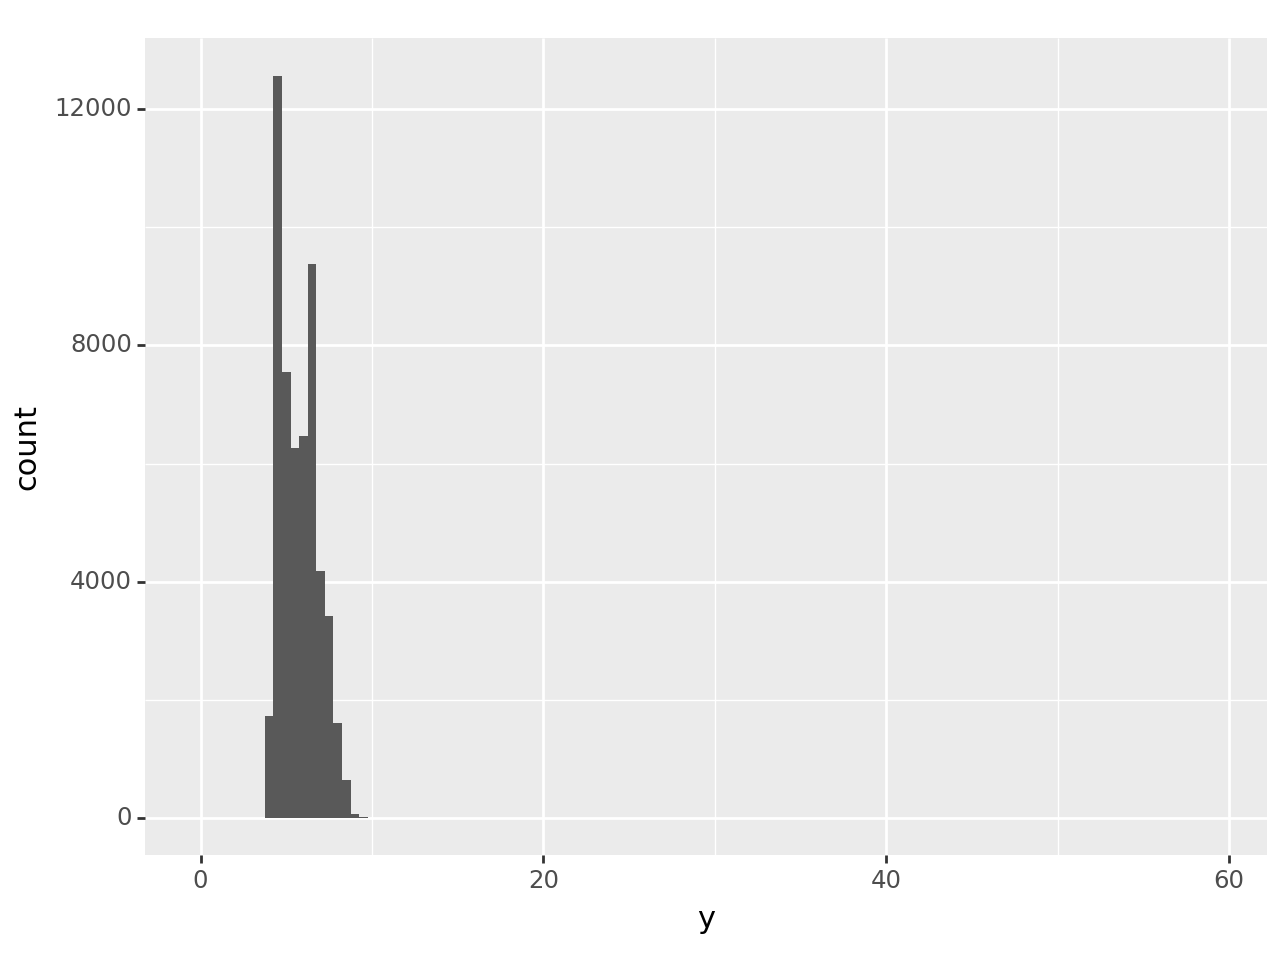

<Figure Size: (640 x 480)>

In [12]:
ggplot(diamonds, aes(x = 'y')) + geom_histogram(binwidth = 0.5)

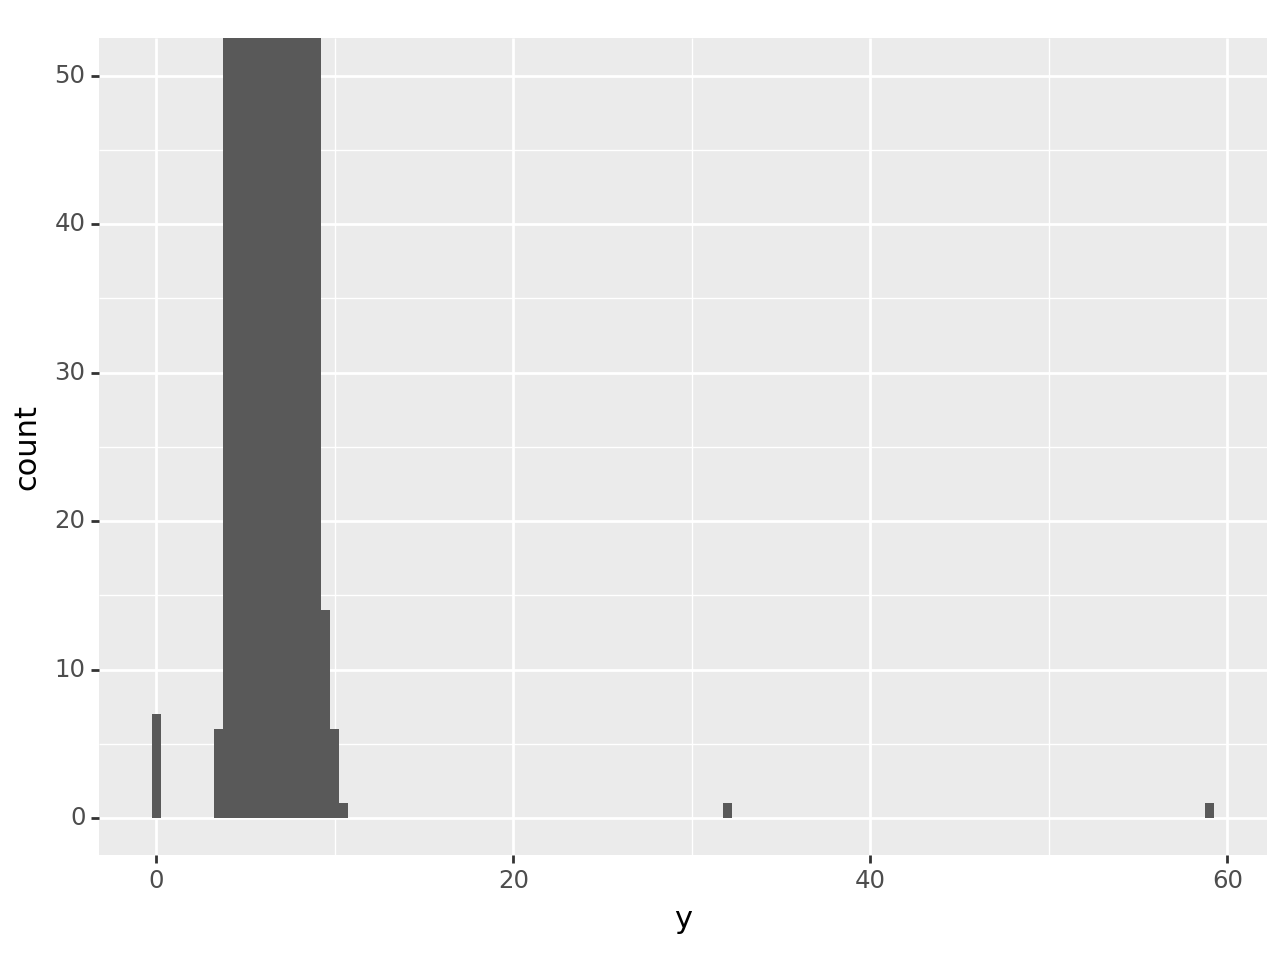

<Figure Size: (640 x 480)>

In [13]:
(
  ggplot(diamonds, aes(x = 'y')) +
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = [0, 50])  # Zoom in
)

In [21]:
# Grab those values
unusual = diamonds[(diamonds['y'] < 3) | (diamonds['y'] > 20)]
unusual

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.0,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.0,0.00
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.0,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.0,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.0,0.00
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00


In [24]:
unusual[['price','x','y','z']].sort_values('y')

,price,x,y,z
11963,5139,0.00,0.0,0.00
15951,6381,0.00,0.0,0.00
24520,12800,0.00,0.0,0.00
26243,15686,0.00,0.0,0.00
27429,18034,0.00,0.0,0.00
49556,2130,0.00,0.0,0.00
49557,2130,0.00,0.0,0.00
49189,2075,5.15,31.8,5.12
24067,12210,8.09,58.9,8.06


### Dealing with unusual values
1. Drop that data point (the whole row). **This is not recommended.**
2. Replace with `NaN` (More on this next week)

In [28]:
# 1. Drop the data point
diamonds2 = diamonds[(diamonds['y'] >=3) & (diamonds['y'] <= 20)]
diamonds2.shape  # Remove 9 points

(53931, 10)

In [32]:
# 2. Replace with NaN
diamonds2 = diamonds.copy() # copy the dataset first
diamonds2.loc[(diamonds2['y'] < 3) | (diamonds2['y'] > 20), 'y'] = None #None will be converted to NaN in pandas

# Let's check the results. We are using diamonds index here.
diamonds2[(diamonds['y'] < 3) | (diamonds['y'] > 20)][['price','x','y','z']]

,price,x,y,z
11963,5139,0.00,NaN,0.00
15951,6381,0.00,NaN,0.00
24067,12210,8.09,NaN,8.06
24520,12800,0.00,NaN,0.00
26243,15686,0.00,NaN,0.00
27429,18034,0.00,NaN,0.00
49189,2075,5.15,NaN,5.12
49556,2130,0.00,NaN,0.00
49557,2130,0.00,NaN,0.00


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


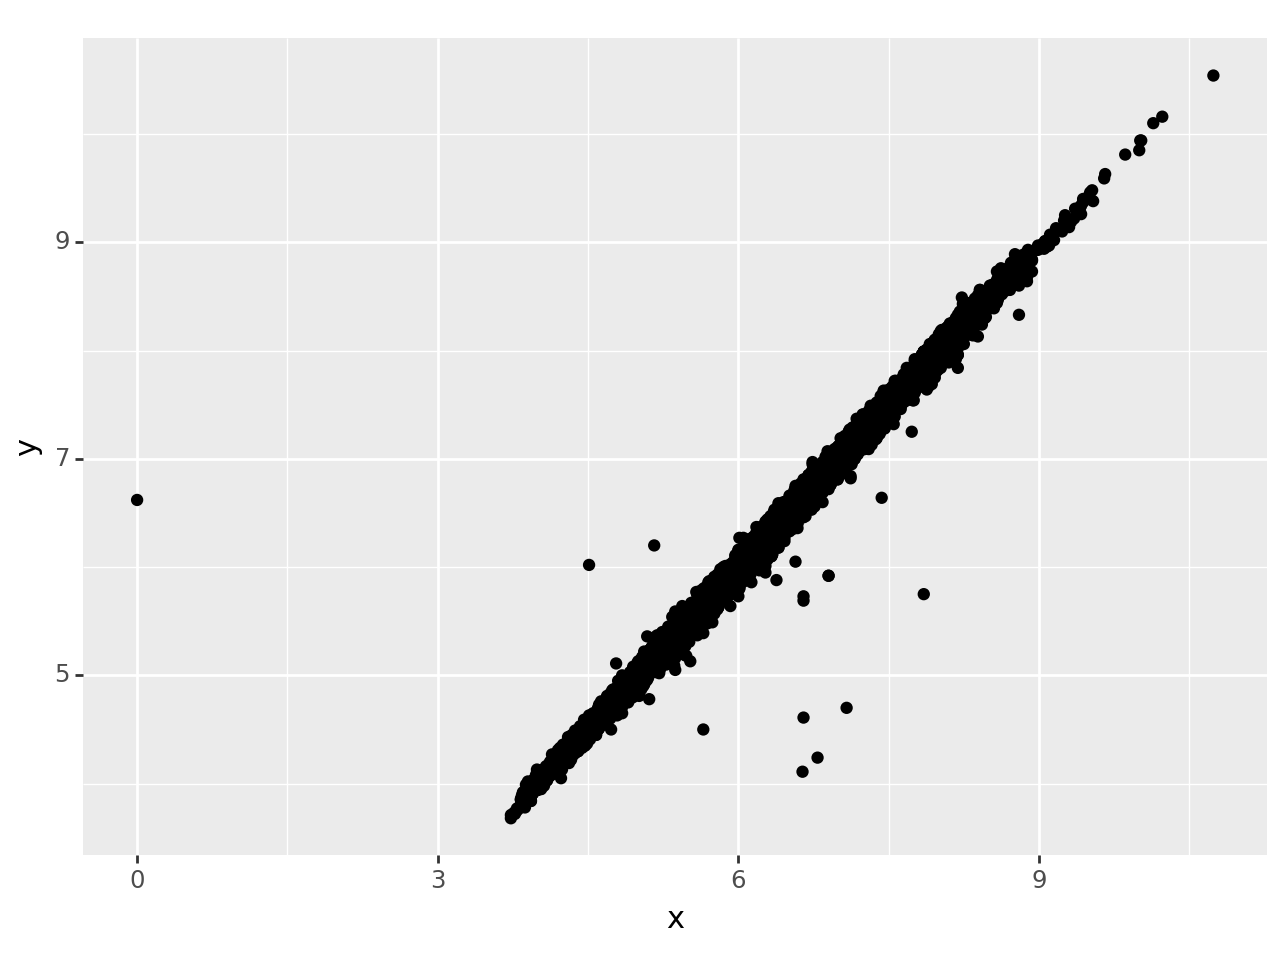

<Figure Size: (640 x 480)>

In [36]:
# By default, ggplot will warn you about NaN
ggplot(diamonds2, aes(x = 'x', y = 'y')) + geom_point()

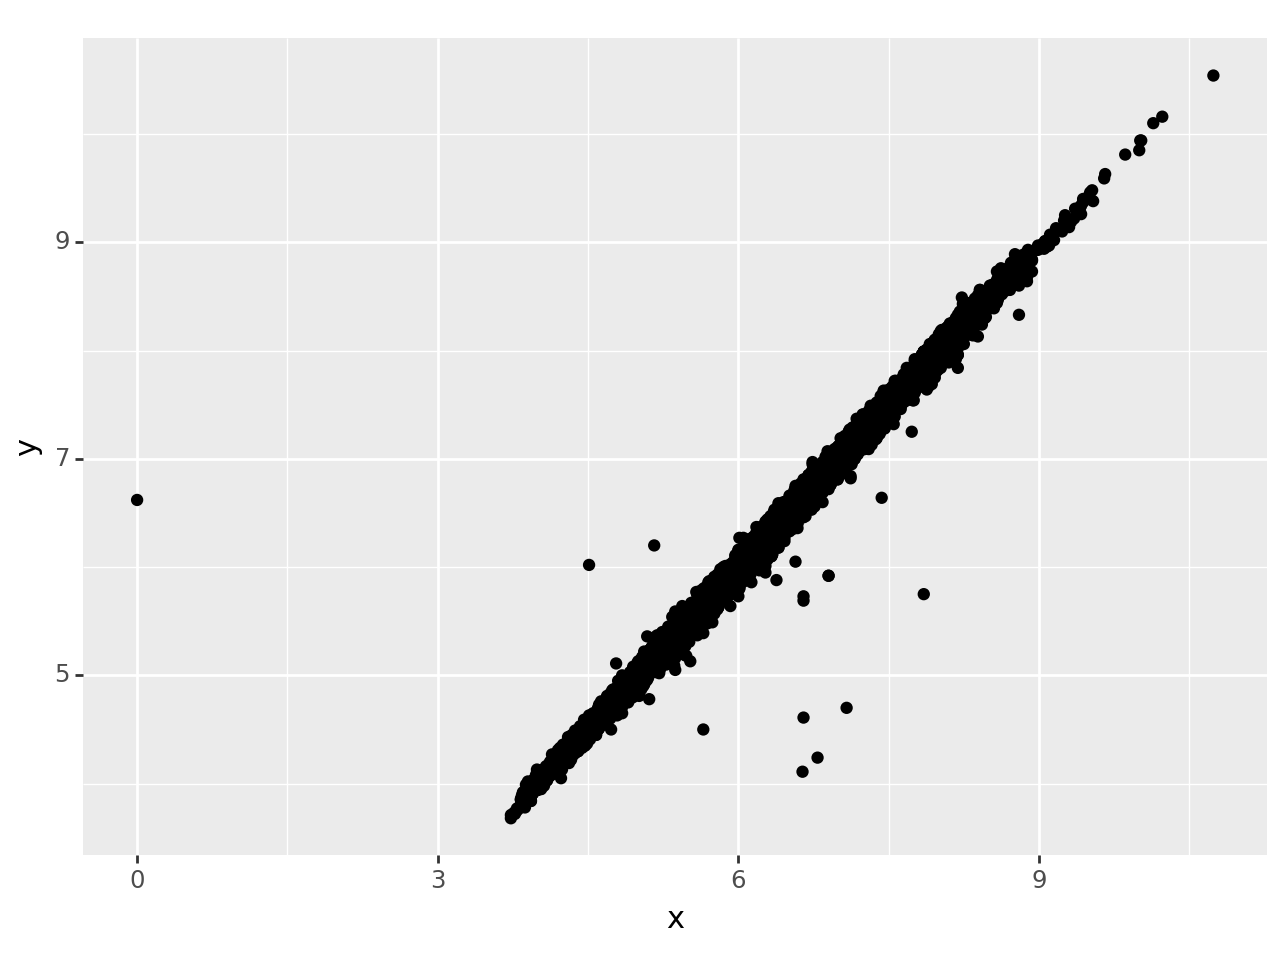

<Figure Size: (640 x 480)>

In [37]:
# We can remove NaN from the plot
ggplot(diamonds2, aes(x = 'x', y = 'y')) + geom_point(na_rm = True)

### Covariation

- **Covariation** is the tendency for the values of two or more variables to vary together in a related way.
- To spot covariation: visualize the relationship between two or more variables

#### A categorical and a numerical variable
- Q: What is the relationship between price and quality (measured by `cut`)?
- We will use `geom_freqpoly()` to explore this question.
- `geom_freqpoly()` is just a histograms but with lines instead.

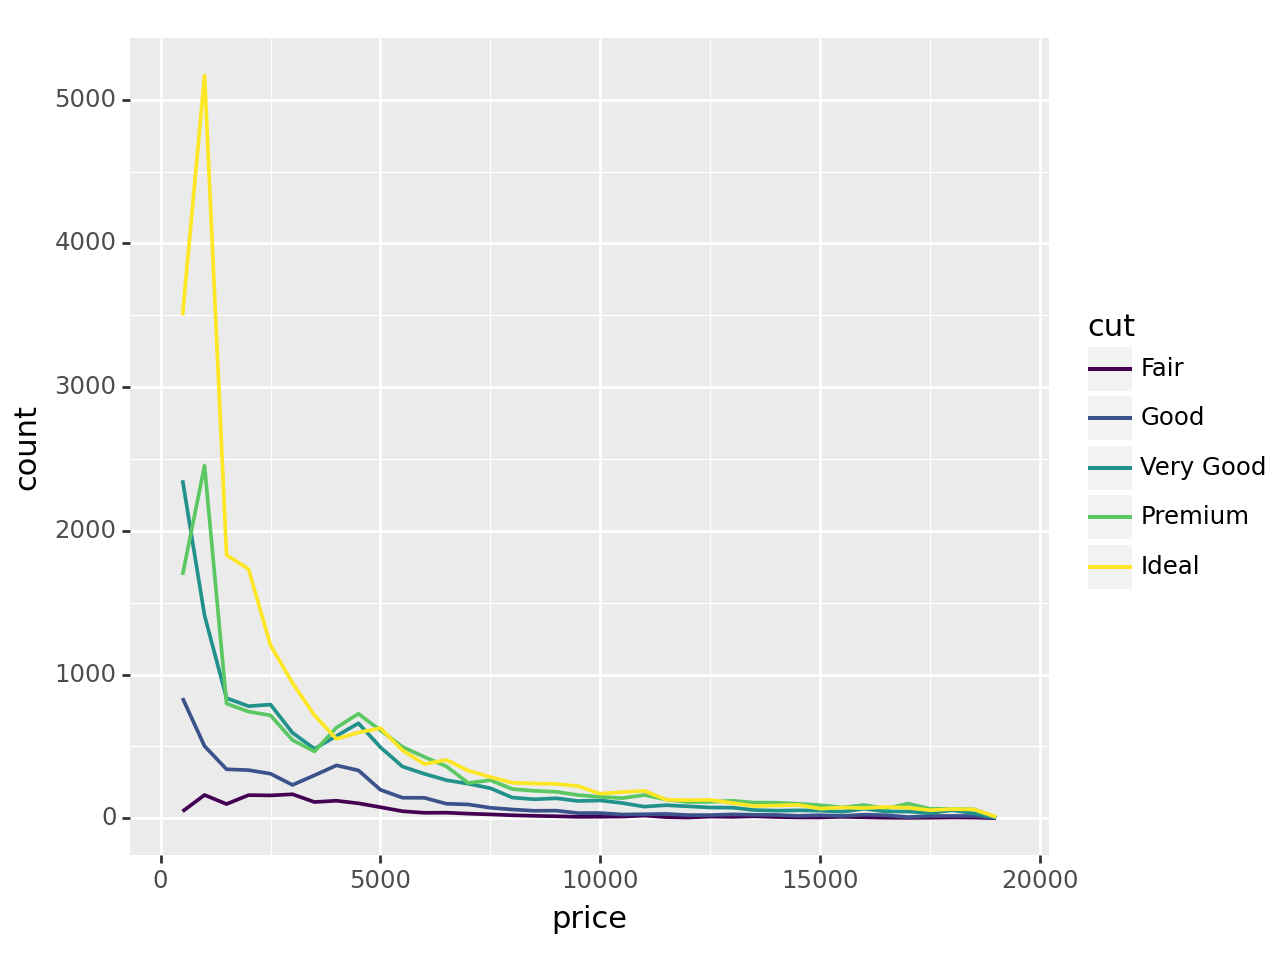

<Figure Size: (640 x 480)>

In [42]:
(
    ggplot(diamonds, aes(x = 'price')) +
    geom_freqpoly(aes(color = 'cut'), binwidth = 500, size = 0.75)
)

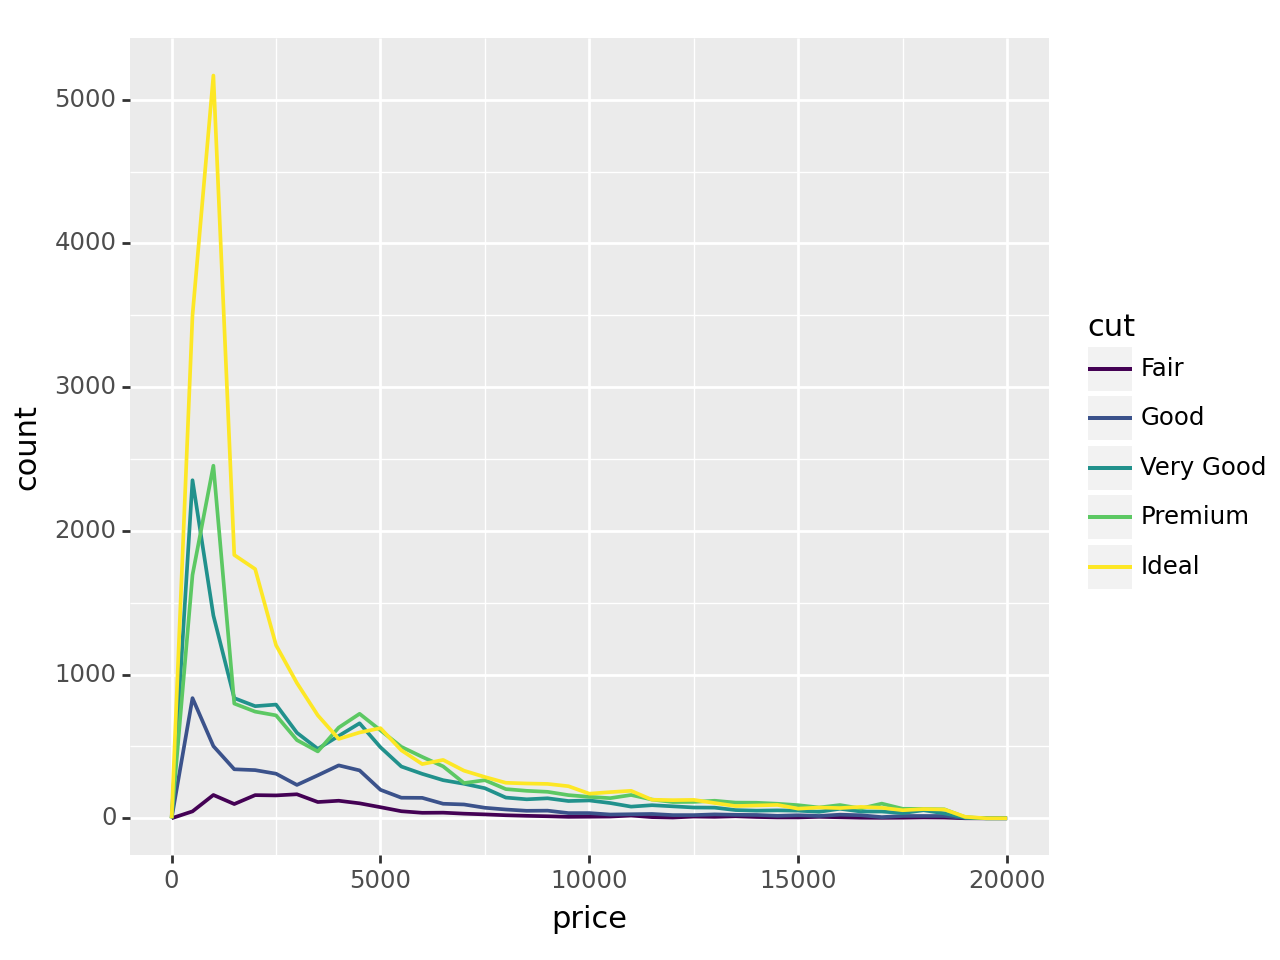

<Figure Size: (640 x 480)>

In [43]:
(
    ggplot(diamonds, aes(x = 'price')) +
    geom_freqpoly(aes(color = 'cut'), binwidth = 500, size = 0.75) +
    xlim([-1,20000])
)

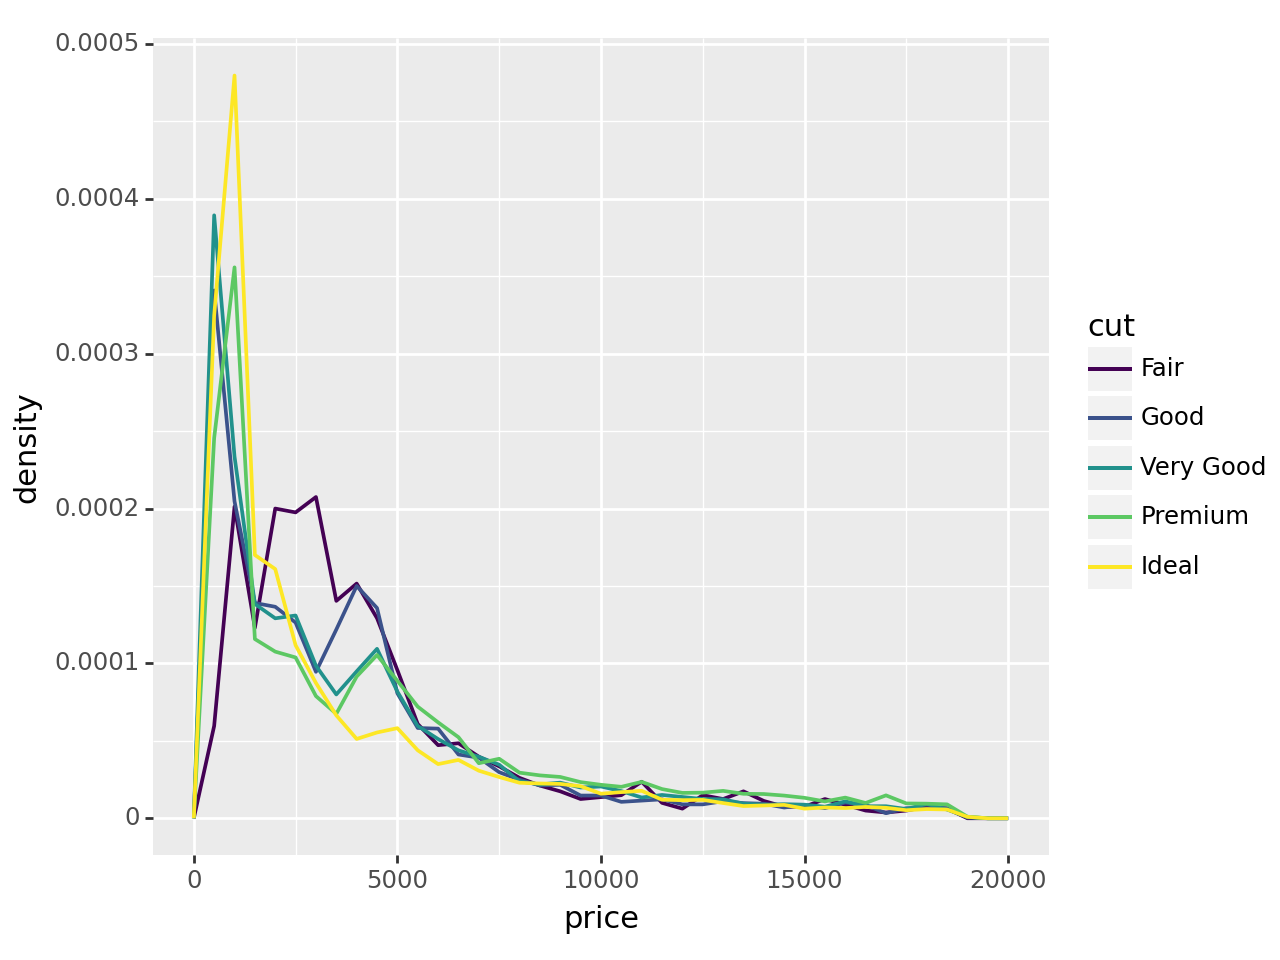

<Figure Size: (640 x 480)>

In [52]:
# Count may not be useful -> Let's do density (area sum to 1) instead.
(
    ggplot(diamonds, aes(x = 'price', y = after_stat("density"))) +
    geom_freqpoly(aes(color = 'cut'), binwidth = 500, size = 0.75) +
    xlim([-1,20000])
)

- It seems like fair diamonds (lowest quality) have the highest average price!?
- Let's check this using a different plot, boxplot.

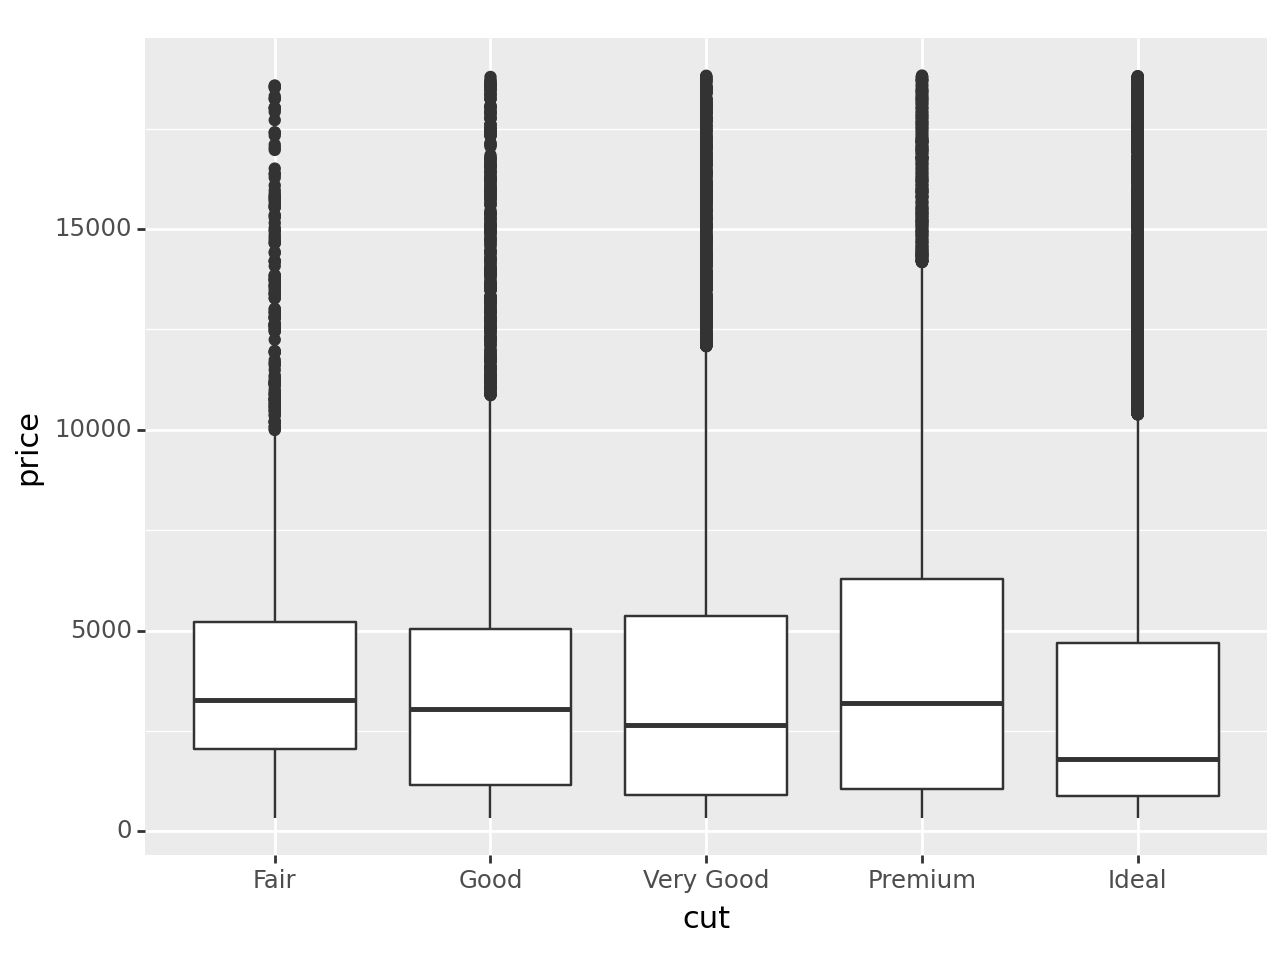

<Figure Size: (640 x 480)>

In [53]:
ggplot(diamonds, aes(x = 'cut', y = 'price')) + geom_boxplot()

#### Two categorical variables

- Q: What is the relationship between `color` and `quality` (`cut`)?
- They are both categorical variables.
- You will have to look at count. Many ways to do this.

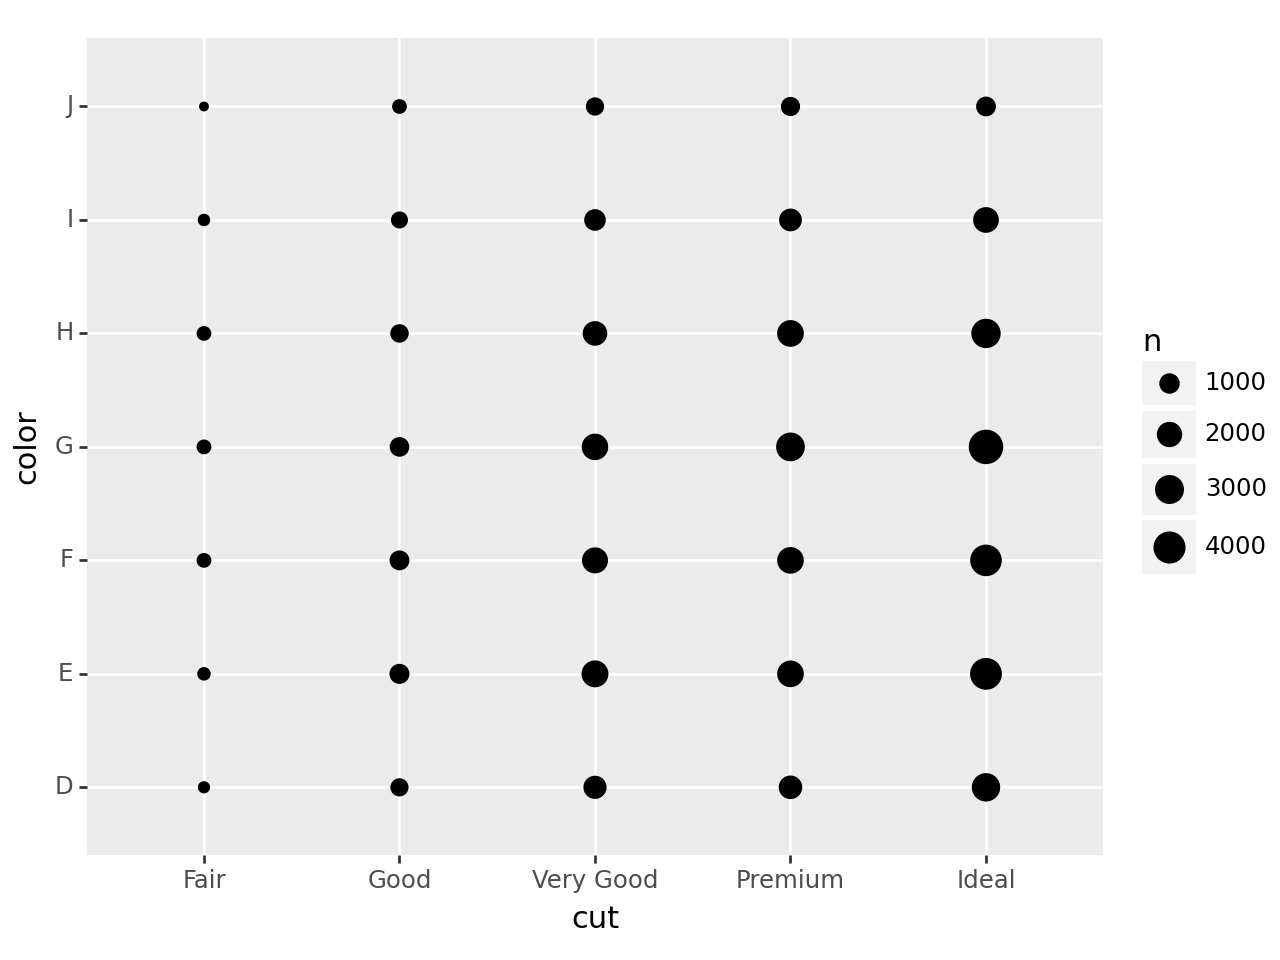

<Figure Size: (640 x 480)>

In [54]:
# We can use geom_count() to count. https://plotnine.org/reference/geom_count.html
ggplot(diamonds, aes(x = 'cut', y = 'color')) + geom_count()

In [63]:
# We can also use groupby to 'visualize' this
count_cc = diamonds.groupby(['color','cut']).agg("size")
count_cc

<ipython-input-63-e02e09934742>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


color  cut      
D      Fair          163
       Good          662
       Very Good    1513
       Premium      1603
       Ideal        2834
E      Fair          224
       Good          933
       Very Good    2400
       Premium      2337
       Ideal        3903
F      Fair          312
       Good          909
       Very Good    2164
       Premium      2331
       Ideal        3826
G      Fair          314
       Good          871
       Very Good    2299
       Premium      2924
       Ideal        4884
H      Fair          303
       Good          702
       Very Good    1824
       Premium      2360
       Ideal        3115
I      Fair          175
       Good          522
       Very Good    1204
       Premium      1428
       Ideal        2093
J      Fair          119
       Good          307
       Very Good     678
       Premium       808
       Ideal         896
dtype: int64

In [65]:
# Turn series into a proper dataframe
count_cc = count_cc.reset_index().rename(columns={0:'n'}) #Alternative .reset_index(name='n')
count_cc

,index,color,cut,n
0,0,D,Fair,163
1,1,D,Good,662
2,2,D,Very Good,1513
3,3,D,Premium,1603
4,4,D,Ideal,2834
5,5,E,Fair,224
6,6,E,Good,933
7,7,E,Very Good,2400
8,8,E,Premium,2337
9,9,E,Ideal,3903


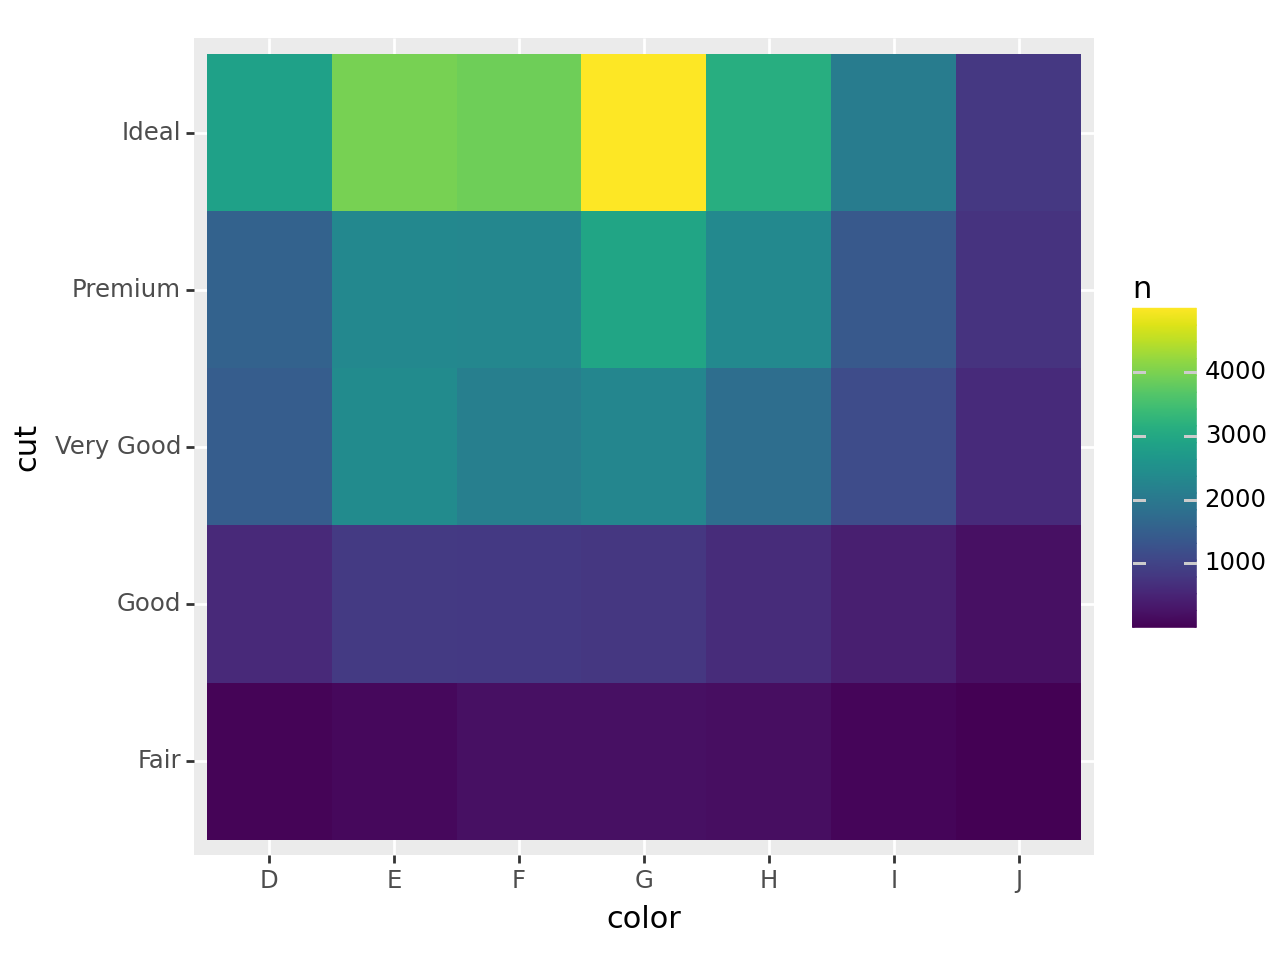

<Figure Size: (640 x 480)>

In [66]:
# Then we can plot the heatmap using geom_tile
ggplot(count_cc, aes(x = 'color', y = 'cut')) + geom_tile(aes(fill = 'n'))

#### Two numerical variables
- Q: What is the relationship between `price` and `quality`?
- Both are numerical. We can use scatter plot.

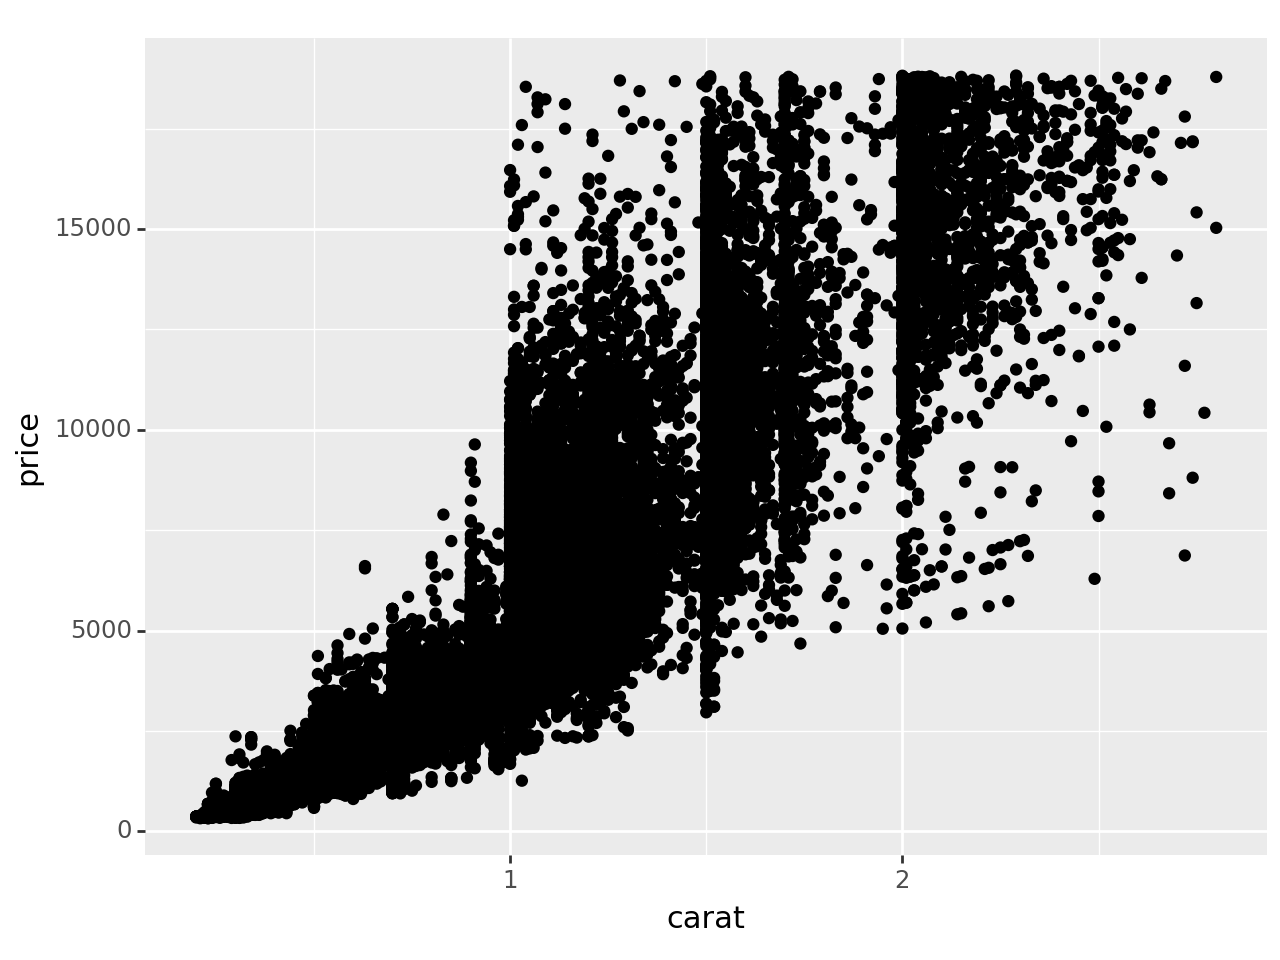

<Figure Size: (640 x 480)>

In [67]:
# Let's look at small ones only
smaller = diamonds[diamonds['carat']<3]
ggplot(smaller, aes(x = 'carat', y = 'price')) + geom_point()

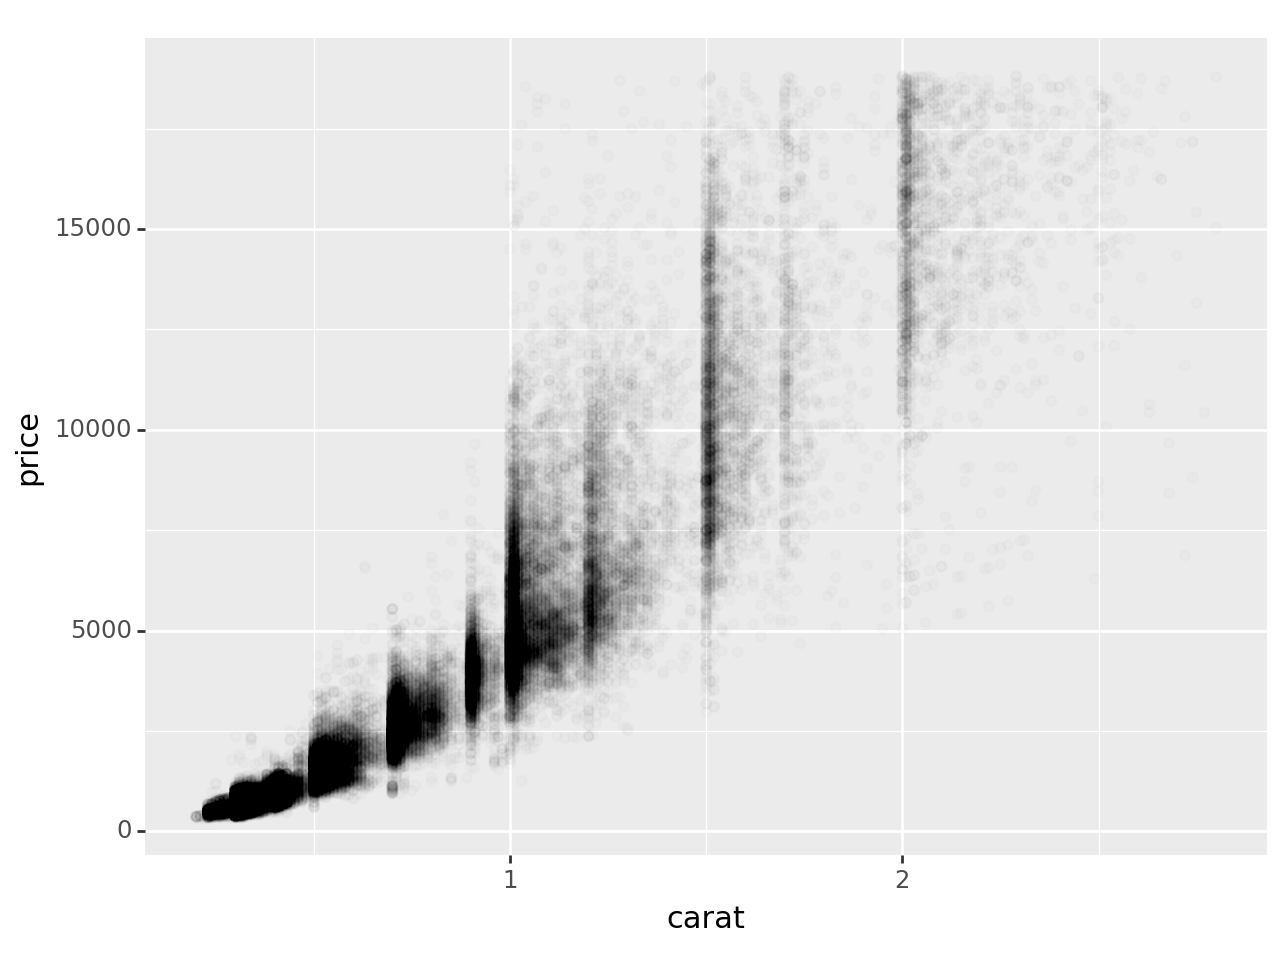

<Figure Size: (640 x 480)>

In [68]:
# Hard to see -> We can reduce alpha
ggplot(smaller, aes(x = 'carat', y = 'price')) + geom_point(alpha = 0.01)

- We can bin a numerical variable to turn it into a categorical variable.
- Then we can use boxplot. You will do it in your homework.
- $\texttt{plotnine}$ provides several ways to do binning too. We will explore one, `bin2d`

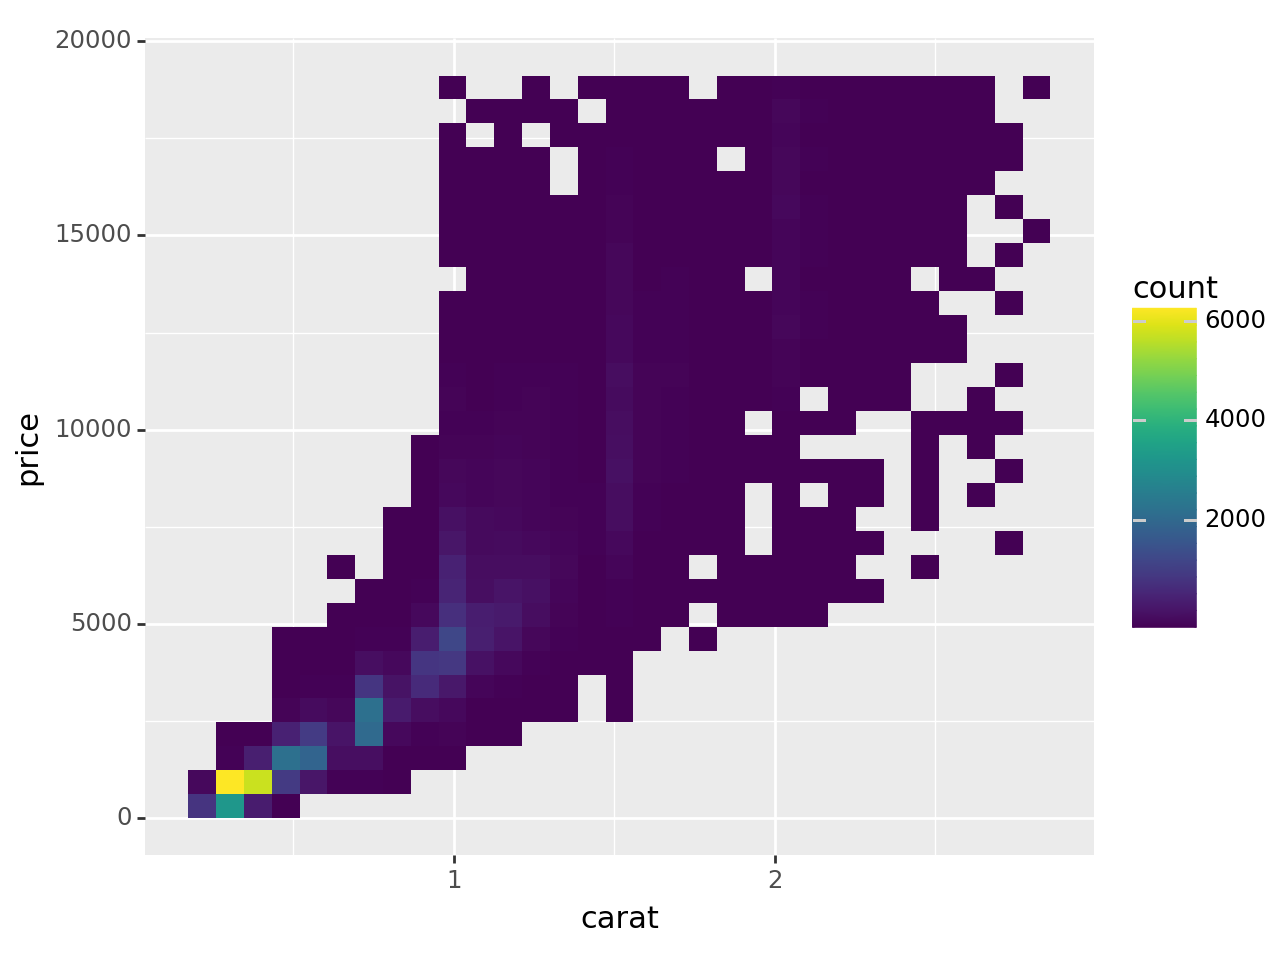

<Figure Size: (640 x 480)>

In [70]:
ggplot(smaller, aes(x = 'carat', y = 'price')) + geom_bin2d()

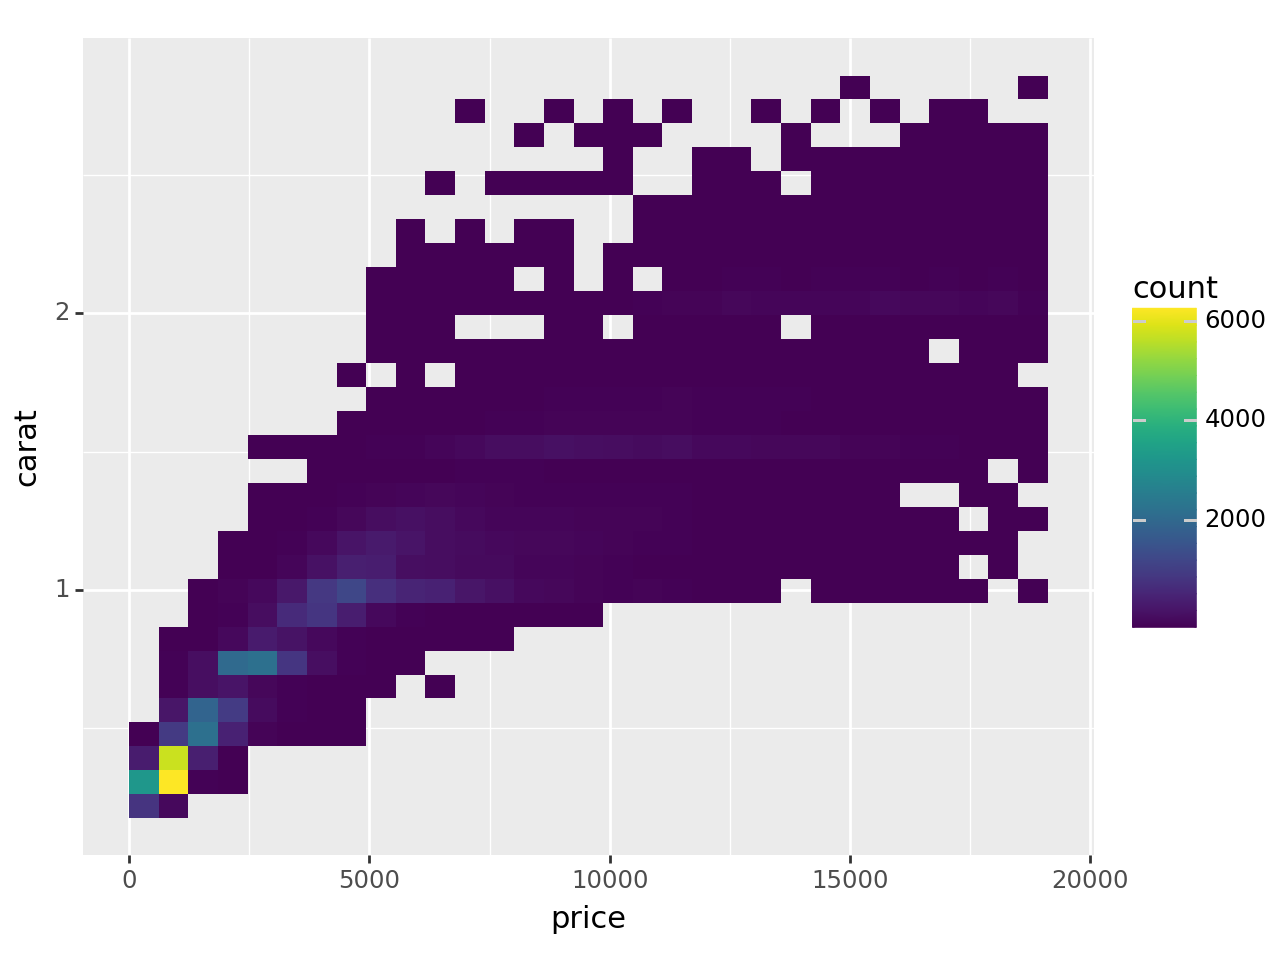

<Figure Size: (640 x 480)>

In [71]:
# Let's reorder the plot. x is now price and y is carat.
# What do you see?
ggplot(smaller, aes(x = 'price', y = 'carat')) + geom_bin2d()

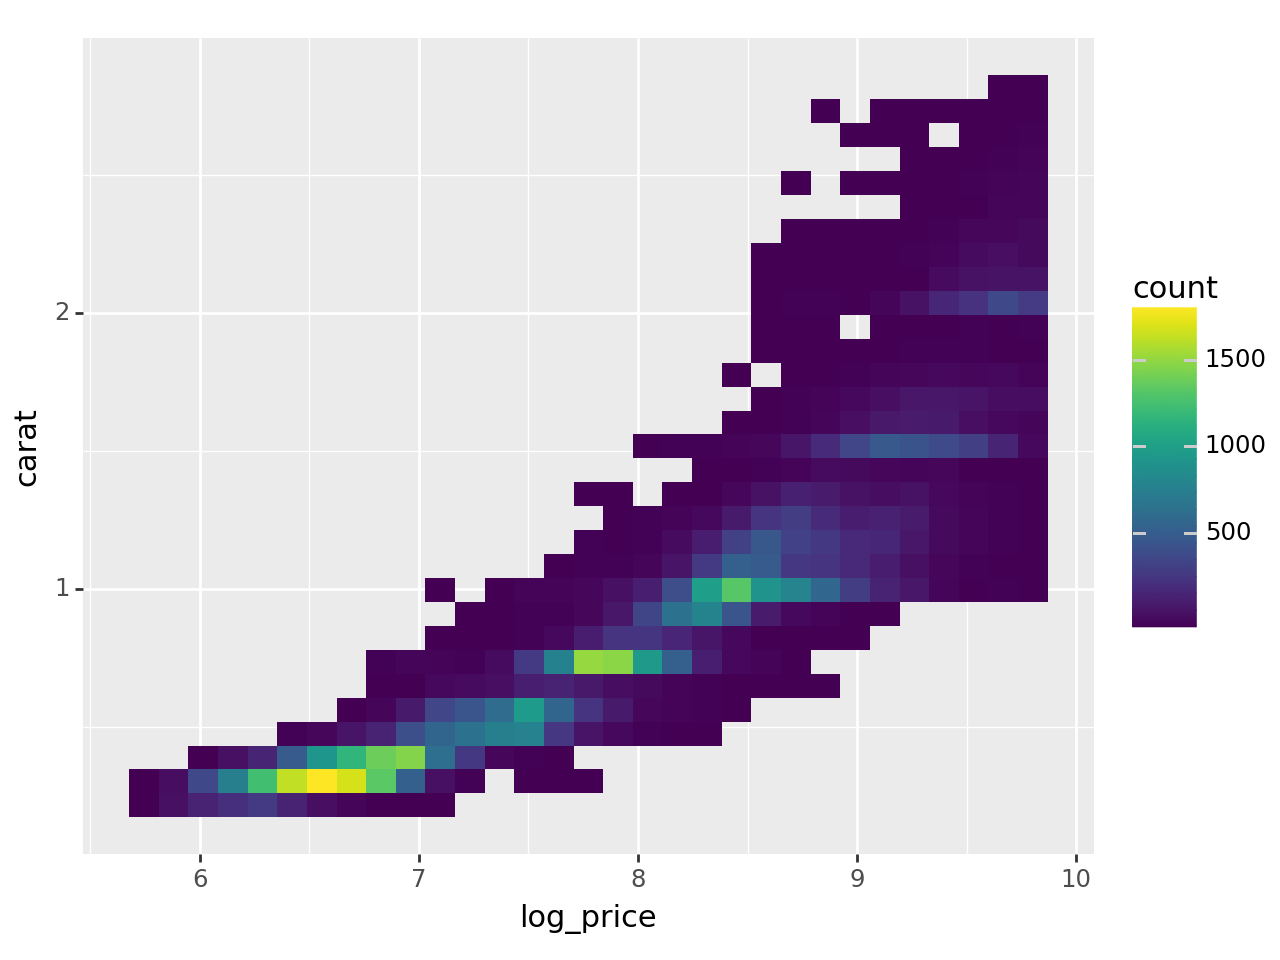

<Figure Size: (640 x 480)>

In [74]:
# Log transformation
import numpy as np

smaller.loc[:,'log_price'] = smaller['price'].transform(np.log) # you can also do np.log(smaller['price'])
ggplot(smaller, aes(x = 'log_price', y = 'carat')) + geom_bin2d()

<ipython-input-77-15ba85dcea38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


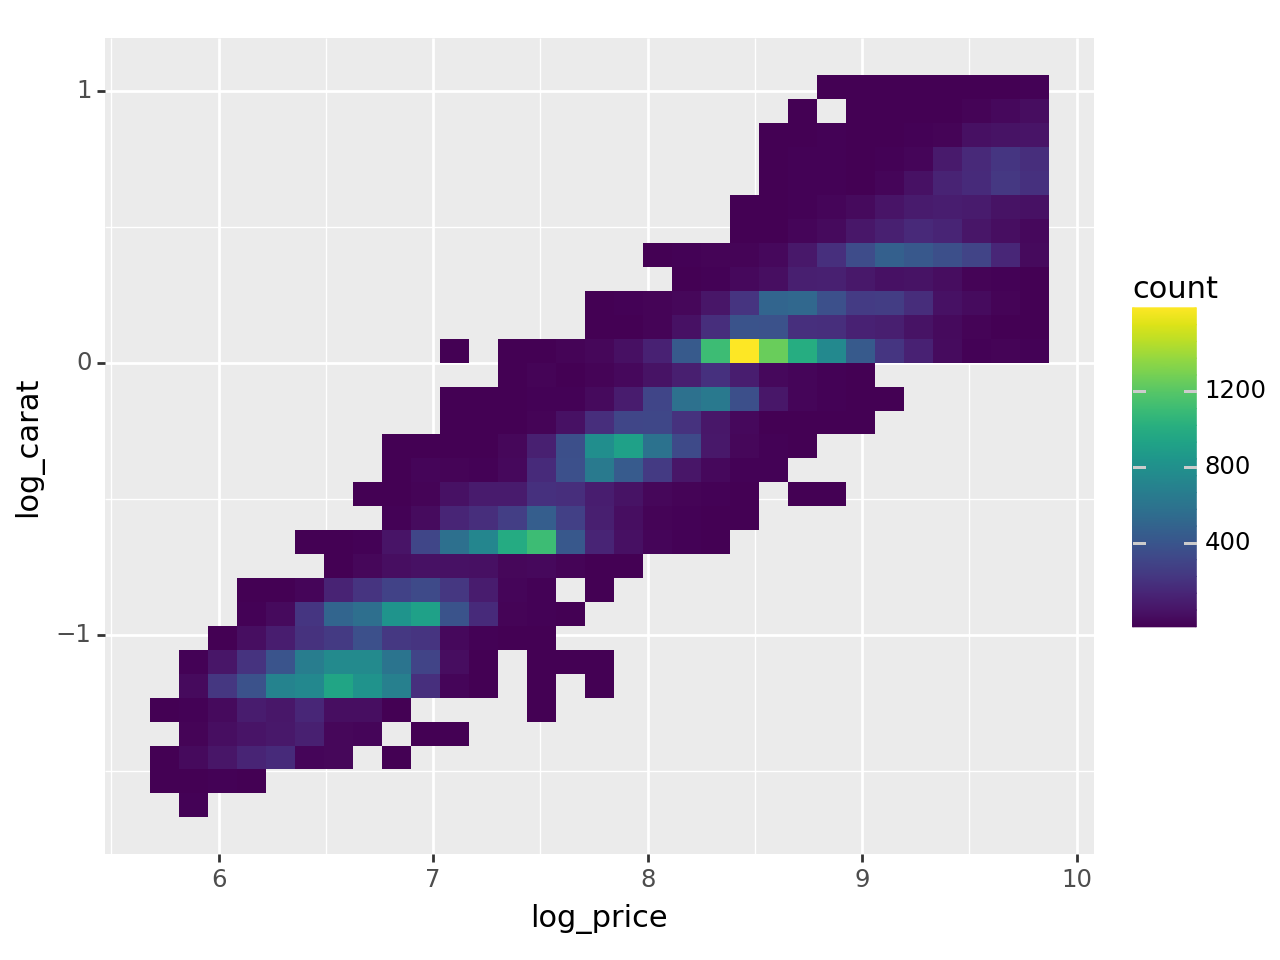

<Figure Size: (640 x 480)>

In [77]:
# Let's try to do it with carat too
smaller['log_carat'] = np.log(smaller['carat'])
ggplot(smaller, aes(x = 'log_price', y = 'log_carat')) + geom_bin2d()

###  Patterns and models

If you found a systematic relationship between two variables, you could ask:

- Could this pattern be due to coincidence (i.e. random chance)?

- How can you describe the relationship implied by the pattern?

- How strong is the relationship implied by the pattern?

- What other variables might affect the relationship?

- Does the relationship change if you look at individual subgroups of the data?

More on the modeling in the second half!!

### Summary
- In general, you want to check all variables that you're interested in individually.
- You also want to check groups of variables that may vary together.